# SIGN MINST Project
The SIGN MINST dataset is a collection of images of hand gestures representing numbers in sign language. It is a variation of the popular MNIST dataset, which is a collection of handwritten digits. The SIGN MINST dataset consists of 27,455 grayscale images of size 28x28 pixels, each representing a sign language gesture for a number from 0 to 24. 

The SIGN MINST dataset is a valuable resource for researchers working on computer vision and machine learning applications related to sign language recognition.

**Task**: Supervised Learning Classification

**Type of Classification**: Multi-class classification (Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes)

**Models Tested**: kNN + Logistic Regression + Random Forest + MLP

## Imports
Importing relevant Python libraries for visualization, machine learning, and manipulation purposes

In [1]:
!pip install scikeras[tensorflow]

#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import image as mpimg
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix
from PIL import Image

plt.style.use('seaborn-whitegrid')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.0 MB/s eta 0:00:0000:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.83.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.


<Figure size 640x480 with 0 Axes>

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

## Load Data
Section used to import the training and test datasets

Helper function used to load the file as a CSV, given its path

In [3]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

Load *training* and *testing* datasets

In [4]:
# Directory Paths
data_dir = '../input/sign-language-mnist/'
train_dir = data_dir + 'sign_mnist_train/sign_mnist_train.csv'
test_dir = data_dir + 'sign_mnist_test/sign_mnist_test.csv'

# Load training and test dataset
train_dataset = load_file(train_dir)
test_dataset = load_file(test_dir)

## Overall Datasets Insights
Section used to retrieve overall insights from the datasets, specifically, the number and distribution of samples

In [5]:
training_samples = train_dataset['label'].count()
testing_samples = test_dataset['label'].count()
samples = training_samples + testing_samples
print(f'Number of Overall Samples: {samples}')
print(f'Number of Training Samples: {training_samples}')
print(f'Number of Testing Samples: {testing_samples}')
print(f'% of Training Samples: {round(training_samples/samples,1) * 100}')
print(f'% of Testing Samples: {round(testing_samples/samples,1) * 100}')

Number of Overall Samples: 34627
Number of Training Samples: 27455
Number of Testing Samples: 7172
% of Training Samples: 80.0
% of Testing Samples: 20.0


# Training Dataset Insights
Section that includes the main insights from the dataset including histogram visualization of features, number of entries on the dataset, and statistical information about each column on the dataset (mean/count/standard deviation)

## Display Training Dataset
Subsection including an overall overview of the entries on the testing dataset

In [6]:
# Overall training dataset display
display(train_dataset)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


Information about the type of data on the dataset and the number of entires on the dataset

In [7]:
display(train_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


None

Statistical information about the training dataset

In [8]:
# Display training dataset overall statistical insights
display(train_dataset.describe().style)

Histogram visualization of some columns on the dataset

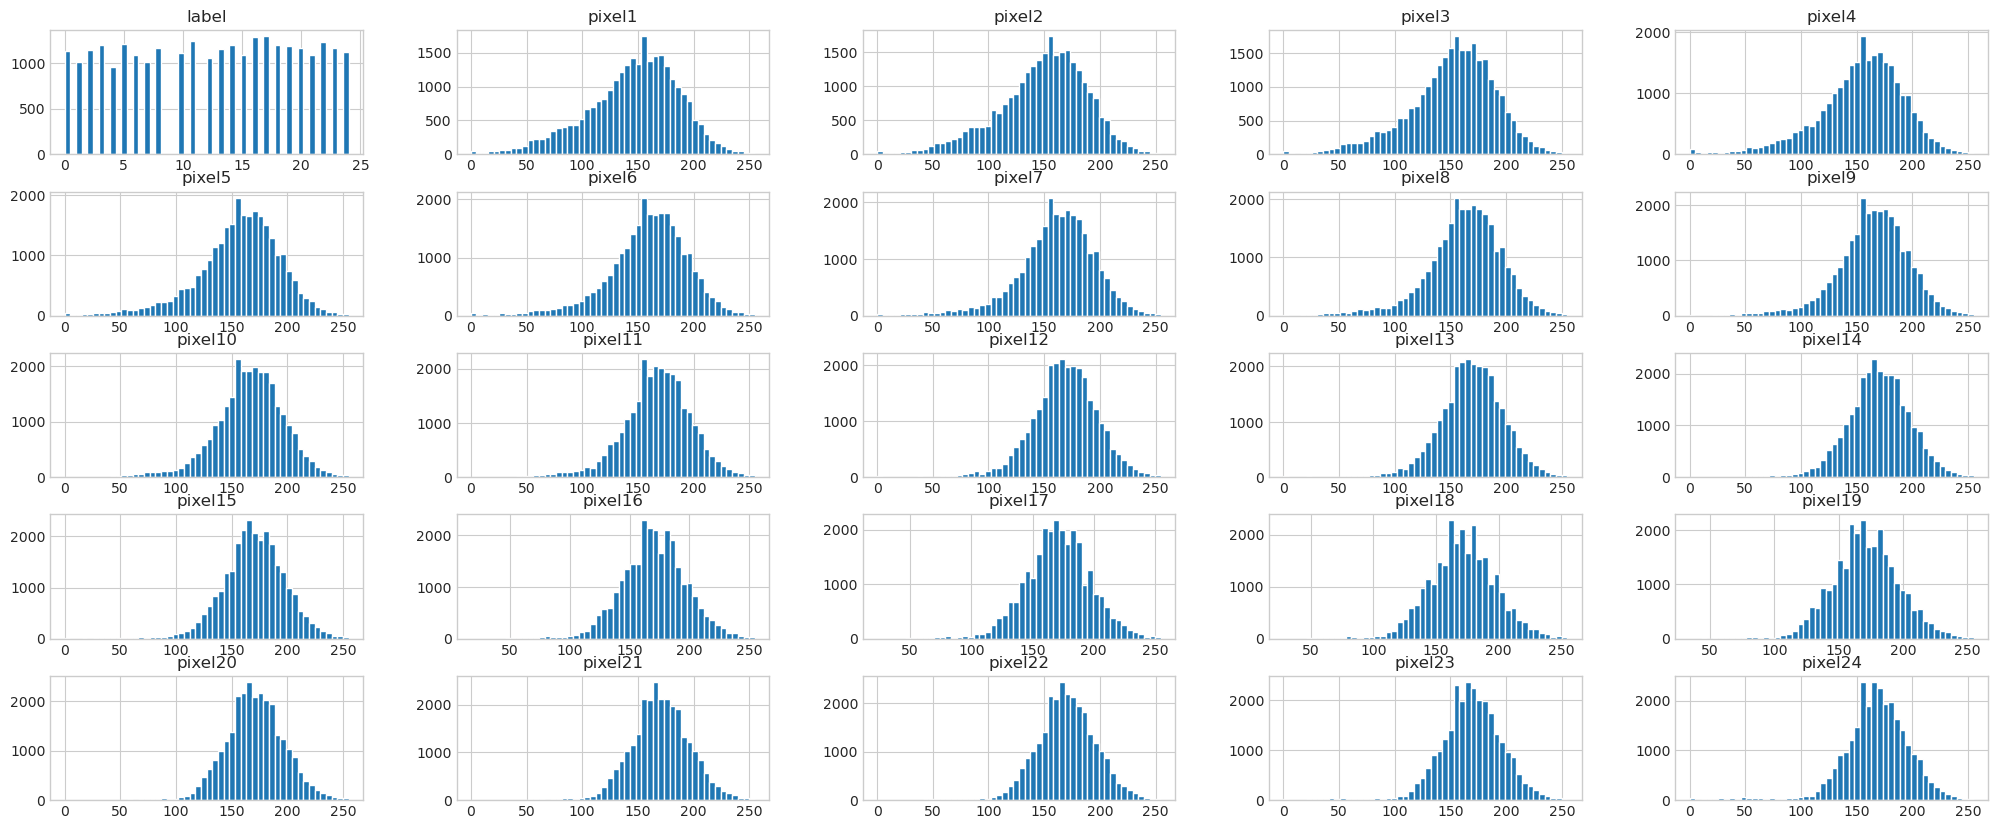

In [9]:
train_dataset.iloc[:,:25].hist(bins=50,figsize=(25,10))
plt.show()

## Training Samples per Class
Training Sample Distribution of the training samples using an histogram and a table format that is sorted from label/class with least sampels to the label/class with most number of samples

In [6]:
samples_per_class = train_dataset[['label','pixel1']].groupby('label').count().reset_index()
samples_per_class.columns = ['Label', 'Number of Samples']
training_samples_df = samples_per_class.set_index('Label')
display(training_samples_df.sort_values('Number of Samples'))

,Number of Samples
Label,
4,957
1,1010
7,1013
12,1055
21,1082
15,1088
6,1090
10,1114
24,1118


Text(0.5, 1.0, 'Training Samples by Class')

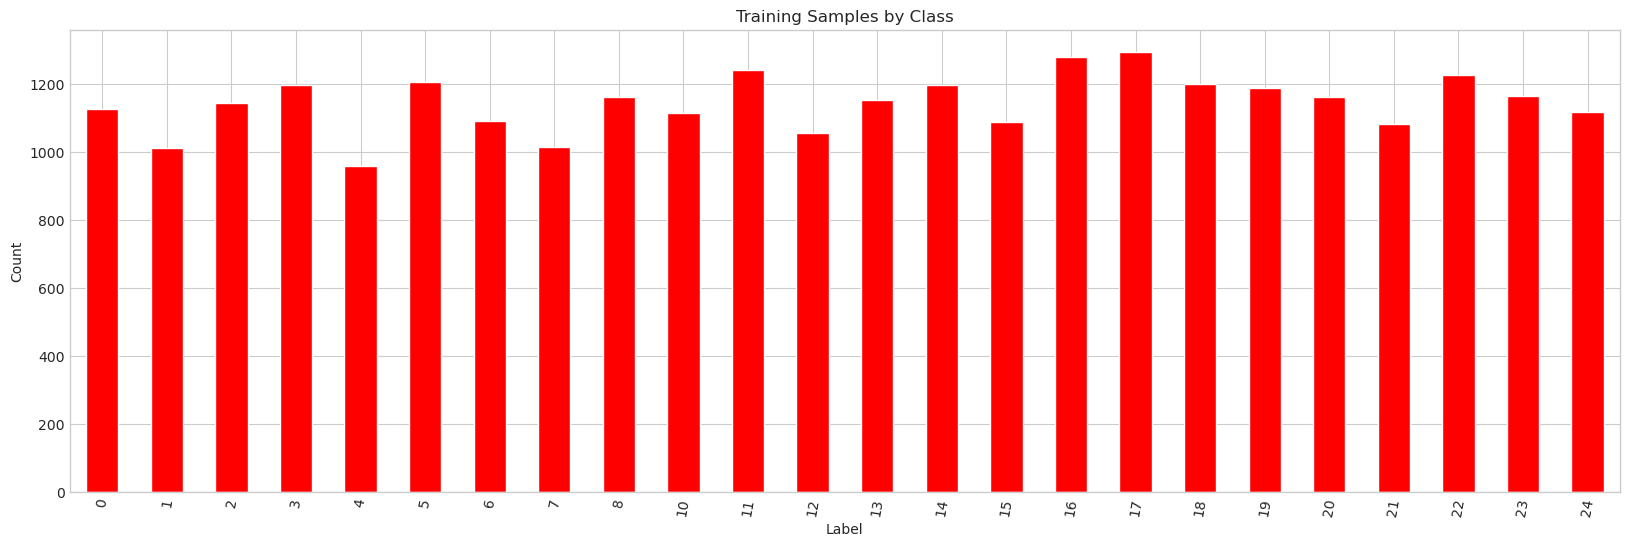

In [11]:
training_samples_df['Number of Samples'].plot.bar(
    color='r', figsize=(20, 6))
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Training Samples by Class')

## Training Samples Distribution Graph
Training Sample Distribution of the training samples. 
* A kernel density estimate (KDE) plot is used as a method for visualizing the distribution of observations in a dataset, analogous to a histogram.
* KDE represents the data using a continuous probability density curve in one or more dimensions.

Text(0.5, 1.0, 'Training Samples Distribution')

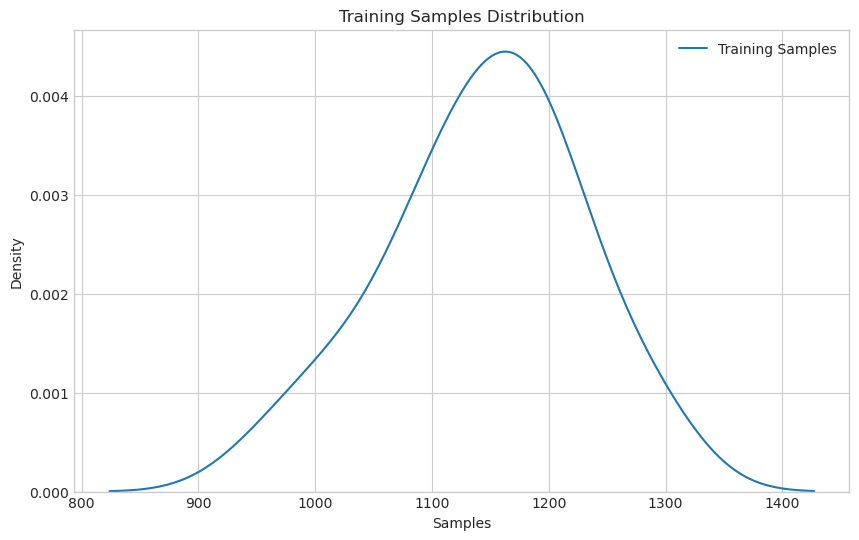

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    samples_per_class['Number of Samples'],label='Training Samples')
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()
plt.title('Training Samples Distribution')

## Training Dataset - % Missing Values
Section that outlines the % of missing values on the dataset

In [13]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_values_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    total_amount = dataset.count() + dataset.isnull().sum()
    total_pd = pd.DataFrame(total_amount,columns=['Samples'])
    missing_percentage = (dataset.isnull().sum() / (dataset.count() + dataset.isnull().sum()))
    missing_percentage_dataset = pd.DataFrame(missing_percentage,columns=['% of Missing Values'])
    missing_dataset = missing_values_dataset.join(total_pd).join(missing_percentage_dataset)
    return missing_dataset

In [14]:
compute_missing_values(train_dataset).sort_values('Missing Values')

,Missing Values,Samples,% of Missing Values
label,0,27455,0.0
pixel517,0,27455,0.0
pixel518,0,27455,0.0
pixel519,0,27455,0.0
pixel520,0,27455,0.0
...,...,...,...
pixel264,0,27455,0.0
pixel265,0,27455,0.0
pixel266,0,27455,0.0
pixel268,0,27455,0.0


## Training Classes
Displays how each numerical value in the label is related with a sign letter and how many nullable values the classes have

In [9]:
classes = pd.DataFrame(train_dataset['label'])
classes['Sign Letter'] = classes['label'].astype(int).apply(lambda x: chr(ord('`')+x+1))
display(classes.sort_values('Sign Letter'))

,label,Sign Letter
5667,0,a
6969,0,a
18083,0,a
24418,0,a
15296,0,a
...,...,...
1397,24,y
26570,24,y
21920,24,y
15585,24,y


In [16]:
classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        27455 non-null  int64 
 1   Sign Letter  27455 non-null  object
dtypes: int64(1), object(1)
memory usage: 429.1+ KB


### Sign Language Letters and Corresponding Images

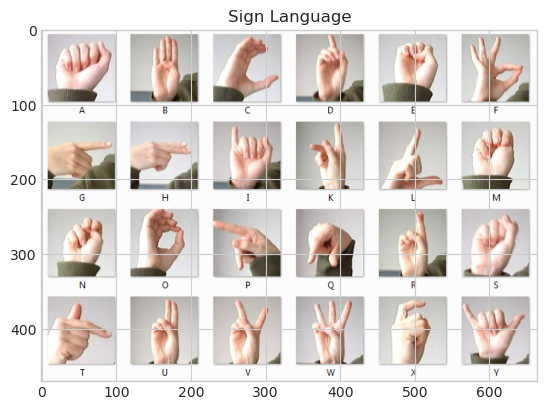

In [17]:
plt.title("Sign Language")
 
image = mpimg.imread("../input/sign-language-mnist/amer_sign2.png")
plt.imshow(image)
plt.show()

### Plot Image from Dataset
Each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s
intensity, from 0 (white) to 255 (black).
We use cmap="binary" to get a grayscale color map where 0 is white and 255 is black

In [18]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

Ploting the first 4 images of the dataset

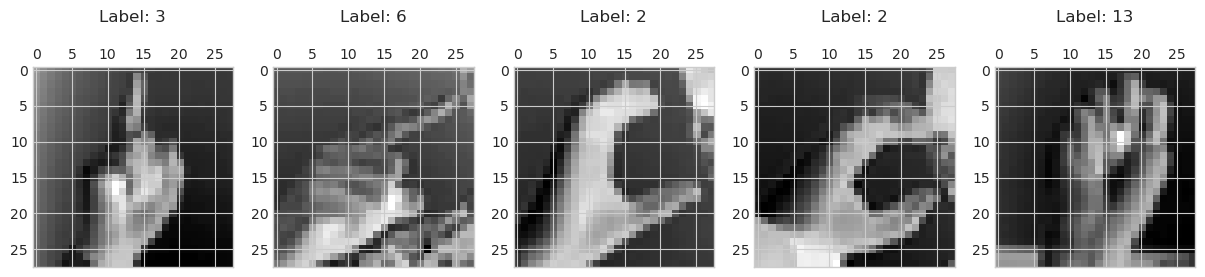

In [19]:
# Using subplot to plot the images from 1 to 4
rows = 1
columns = 5
fig, ax =  plt.subplots(rows, columns, figsize = (15,6))

plt.gray()
for i in range(columns):
    x = pd.DataFrame(train_dataset.loc[i]).transpose().iloc[:,1:]
    image_data = x.to_numpy()
    image = image_data.reshape(28, 28)
    ax[i].matshow(image,cmap="binary") 
    ax[i].set_title('Label: %s\n' % train_dataset['label'][i])
plt.show()

## Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [20]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)

In [21]:
compute_correlations(train_dataset)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,1.000000,-0.136272,-0.129994,-0.113213,-0.104100,-0.097174,-0.096604,-0.086760,-0.074889,-0.069481,...,-0.026358,-0.058140,-0.083063,-0.080966,-0.060393,-0.047260,-0.039771,-0.030824,-0.021529,-0.006100
pixel1,-0.136272,1.000000,0.980925,0.963479,0.945856,0.927414,0.903463,0.878273,0.857203,0.830903,...,0.247990,0.245928,0.266477,0.281247,0.262816,0.255951,0.244069,0.220163,0.186064,0.171375
pixel2,-0.129994,0.980925,1.000000,0.978006,0.952741,0.946009,0.924298,0.899308,0.880546,0.856741,...,0.252370,0.250124,0.267791,0.281535,0.266011,0.259662,0.249105,0.227187,0.194068,0.176169
pixel3,-0.113213,0.963479,0.978006,1.000000,0.978557,0.958317,0.949978,0.932616,0.915696,0.892115,...,0.260565,0.254763,0.269901,0.275948,0.257800,0.251580,0.242006,0.216101,0.183085,0.169881
pixel4,-0.104100,0.945856,0.952741,0.978557,1.000000,0.978603,0.962856,0.954735,0.943060,0.919271,...,0.255885,0.250386,0.265855,0.272967,0.254942,0.248175,0.239362,0.216395,0.182166,0.166320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,-0.047260,0.255951,0.259662,0.251580,0.248175,0.249216,0.243089,0.238803,0.237061,0.237565,...,0.522311,0.622495,0.736375,0.851001,0.951797,1.000000,0.956917,0.905624,0.856725,0.808108
pixel781,-0.039771,0.244069,0.249105,0.242006,0.239362,0.239817,0.233301,0.231006,0.230116,0.228766,...,0.487027,0.580802,0.687589,0.799984,0.886480,0.956917,1.000000,0.956005,0.896892,0.852774
pixel782,-0.030824,0.220163,0.227187,0.216101,0.216395,0.218185,0.212846,0.212645,0.212639,0.208012,...,0.461850,0.545042,0.649787,0.760061,0.847448,0.905624,0.956005,1.000000,0.958818,0.900761
pixel783,-0.021529,0.186064,0.194068,0.183085,0.182166,0.186842,0.185930,0.183467,0.182646,0.186419,...,0.430529,0.511098,0.608408,0.710314,0.796855,0.856725,0.896892,0.958818,1.000000,0.960565


# Testing Dataset Insights
Section that includes the main insights from the dataset including histogram visualization of features, number of entries on the dataset, and statistical information about each column on the dataset (mean/count/standard deviation)

## Display Testing Dataset
Subsection including an overall overview of the entries on the testing dataset

In [22]:
# Overall test dataset display
display(test_dataset)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


Information about the type of data on the dataset and the number of entires on the dataset

In [23]:
display(test_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


None

Statistical information about the testing dataset

In [24]:
# Display test dataset overall statistical insights
display(test_dataset.describe().style)

Histogram visualization of some columns on the dataset

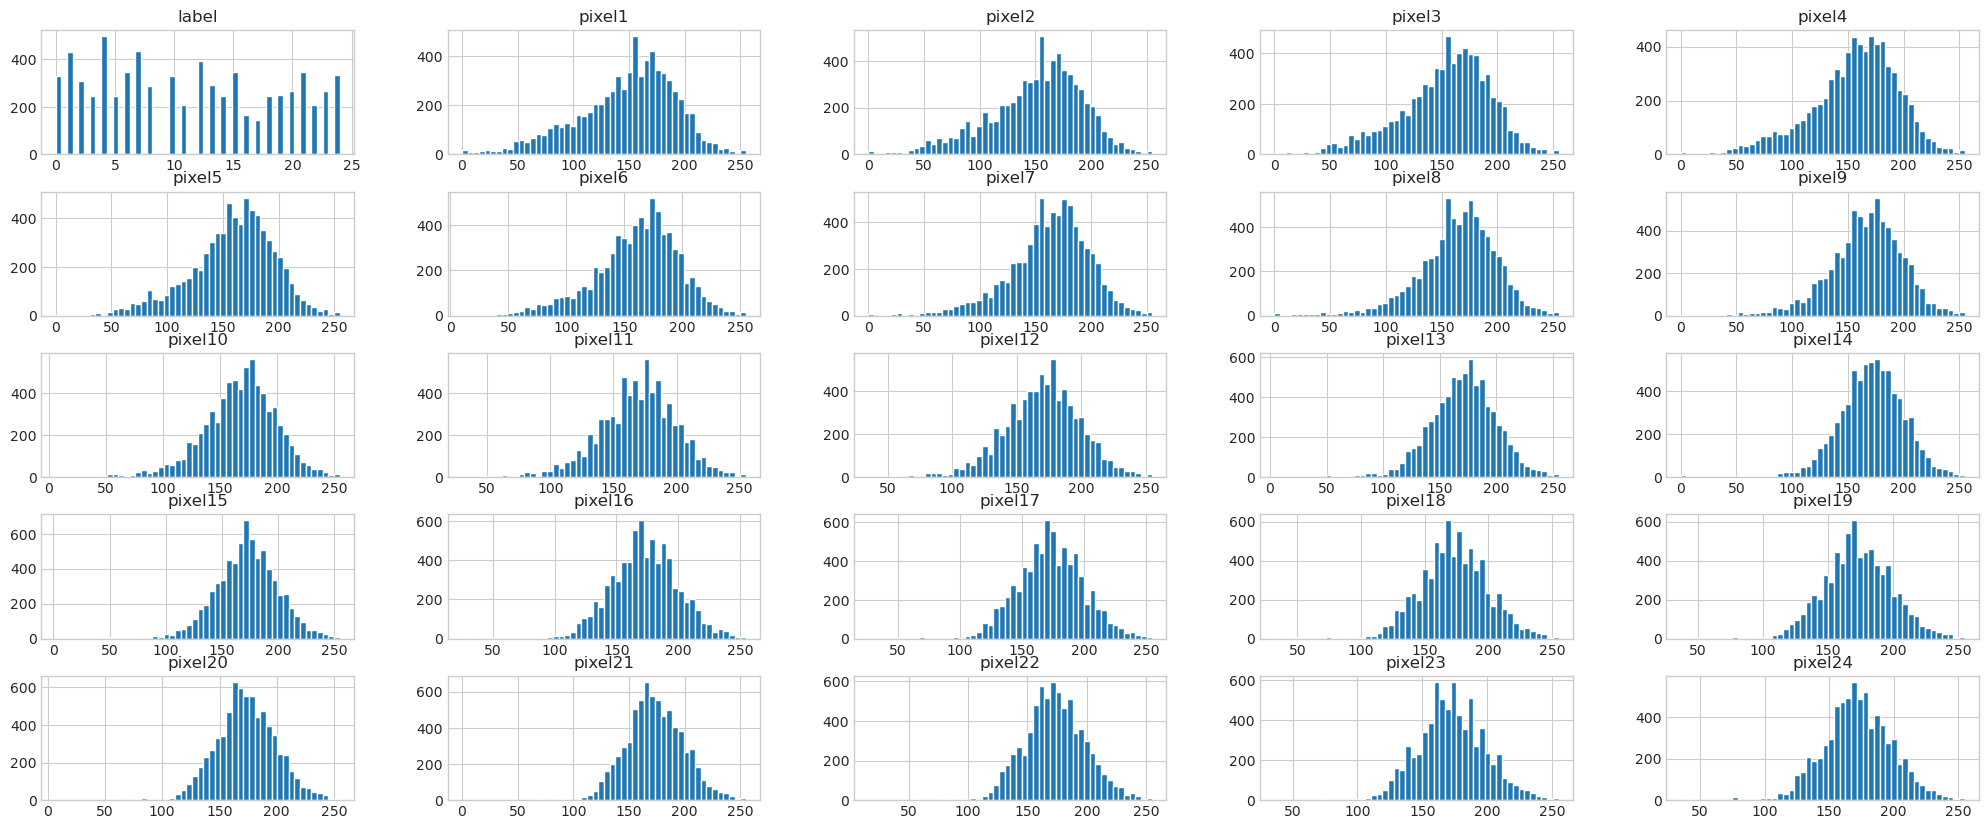

In [25]:
test_dataset.iloc[:,:25].hist(bins=50,figsize=(25,10))
plt.show()

## Testing Samples per Class
Test Sample Distribution of the test samples using an histogram and a table format that is sorted from label/class with least sampels to the label/class with most number of samples

In [7]:
test_samples_per_class = test_dataset[['label','pixel1']].groupby('label').count().reset_index()
test_samples_per_class.columns = ['Label', 'Number of Samples']
test_samples_df = test_samples_per_class.set_index('Label')
display(test_samples_df.sort_values('Number of Samples'))

,Number of Samples
Label,
17,144
16,164
22,206
11,209
3,245
18,246
14,246
5,247
19,248


Text(0.5, 1.0, 'Testing Samples by Class')

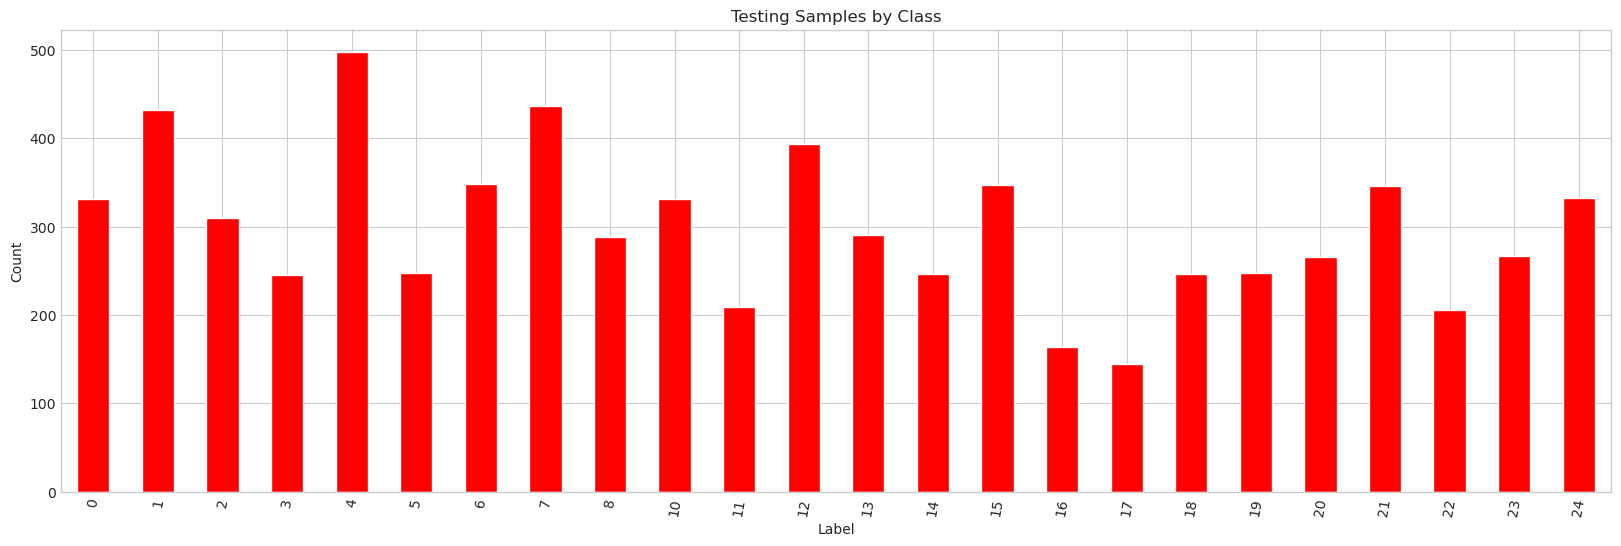

In [27]:
test_samples_df['Number of Samples'].plot.bar(
    color='r', figsize=(20, 6))
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Testing Samples by Class')

## Testing Samples Distribution Graph
Testing Sample Distribution of the test samples. 
* A kernel density estimate (KDE) plot is used as a method for visualizing the distribution of observations in a dataset, analogous to a histogram.
* KDE represents the data using a continuous probability density curve in one or more dimensions.


Text(0.5, 1.0, 'Testing Samples Distribution')

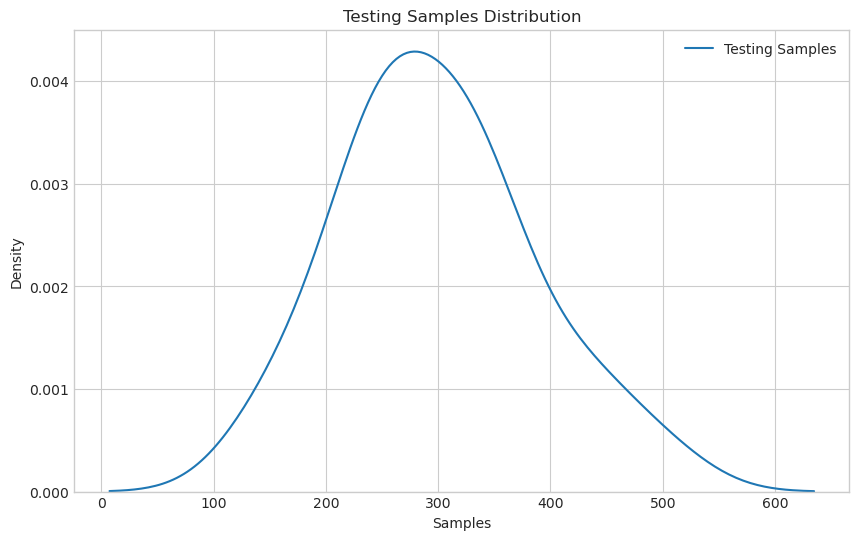

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    test_samples_per_class['Number of Samples'],label='Testing Samples')
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()
plt.title('Testing Samples Distribution')

## Testing Dataset - % Missing Values
Section that outlines the % of missing values on the dataset

In [29]:
compute_missing_values(test_dataset).sort_values('Missing Values')

,Missing Values,Samples,% of Missing Values
label,0,7172,0.0
pixel517,0,7172,0.0
pixel518,0,7172,0.0
pixel519,0,7172,0.0
pixel520,0,7172,0.0
...,...,...,...
pixel264,0,7172,0.0
pixel265,0,7172,0.0
pixel266,0,7172,0.0
pixel268,0,7172,0.0


## Test Classes Insights
Displays how each numerical value in the label is related with a sign letter and how many nullable values the classes have

In [8]:
test_classes = pd.DataFrame(test_dataset['label'])
test_classes['Sign Letter'] = test_classes['label'].astype(int).apply(lambda x: chr(ord('`')+x+1))
display(test_classes.sort_values('Sign Letter'))

,label,Sign Letter
954,0,a
3380,0,a
5775,0,a
6510,0,a
5749,0,a
...,...,...
1294,24,y
1296,24,y
4477,24,y
4440,24,y


In [31]:
test_classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        7172 non-null   int64 
 1   Sign Letter  7172 non-null   object
dtypes: int64(1), object(1)
memory usage: 112.2+ KB


## Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [32]:
compute_correlations(test_dataset)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,1.000000,-0.139418,-0.123404,-0.115611,-0.111252,-0.108470,-0.102475,-0.102522,-0.096548,-0.090850,...,0.048976,-0.045215,-0.103332,-0.061800,-0.004781,0.022475,0.028631,0.033245,0.005135,-0.002017
pixel1,-0.139418,1.000000,0.985206,0.977398,0.960227,0.941672,0.932594,0.869412,0.816606,0.817359,...,0.187086,0.198070,0.226216,0.224802,0.216218,0.206450,0.195379,0.180809,0.158756,0.155438
pixel2,-0.123404,0.985206,1.000000,0.992631,0.973155,0.958994,0.947434,0.896135,0.846742,0.844553,...,0.192527,0.193884,0.219124,0.219256,0.214525,0.204214,0.190383,0.177927,0.158438,0.156197
pixel3,-0.115611,0.977398,0.992631,1.000000,0.986854,0.974316,0.966179,0.916381,0.873471,0.872450,...,0.191868,0.196410,0.219638,0.217668,0.214092,0.203820,0.187702,0.175485,0.156839,0.155058
pixel4,-0.111252,0.960227,0.973155,0.986854,1.000000,0.988731,0.979351,0.954910,0.913750,0.908479,...,0.197317,0.203000,0.222037,0.221062,0.216953,0.205059,0.187775,0.177589,0.160670,0.160200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,0.022475,0.206450,0.204214,0.203820,0.205059,0.197830,0.200701,0.203688,0.197918,0.202837,...,0.468085,0.575559,0.712236,0.833264,0.943733,1.000000,0.966016,0.901036,0.854595,0.840184
pixel781,0.028631,0.195379,0.190383,0.187702,0.187775,0.178208,0.181748,0.184402,0.176377,0.182124,...,0.440022,0.540875,0.664345,0.780524,0.885026,0.966016,1.000000,0.953932,0.896610,0.876586
pixel782,0.033245,0.180809,0.177927,0.175485,0.177589,0.170697,0.171807,0.184852,0.179981,0.184256,...,0.436154,0.524090,0.625715,0.724792,0.825300,0.901036,0.953932,1.000000,0.968166,0.928336
pixel783,0.005135,0.158756,0.158438,0.156839,0.160670,0.160387,0.158152,0.180210,0.185777,0.186570,...,0.424008,0.509738,0.603830,0.689851,0.782135,0.854595,0.896610,0.968166,1.000000,0.972452


# Overall Sample Distribution
Overall Sample Distribution of the training and test samples. 
* A kernel density estimate (KDE) plot is used as a method for visualizing the distribution of observations in a dataset, analogous to a histogram.
* KDE represents the data using a continuous probability density curve in one or more dimensions.

Text(0.5, 1.0, 'Overall Sample Distribution')

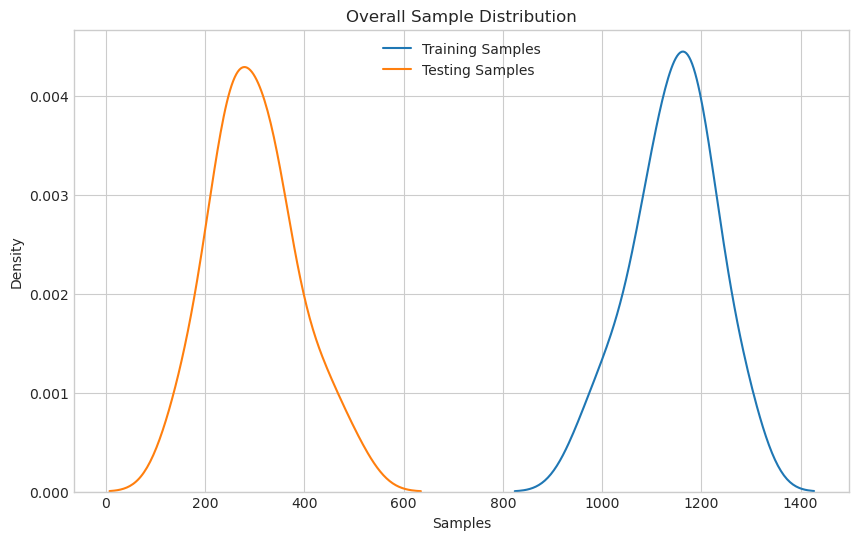

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    samples_per_class['Number of Samples'],label='Training Samples')
sns.kdeplot(
    test_samples_per_class['Number of Samples'], label='Testing Samples')
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()
plt.title('Overall Sample Distribution')

# Train Dataset Split
Section used to split the training dataset into the features (pixels of the image) and the class (outcome sign letter on a numerical format)

### Features Set
Features set containing the pixels associated with each image (e.g., **image 28x 28** -> Label 3/Letter D

In [10]:
X_train = train_dataset.iloc[:,1:]
display(X_train)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


### Classes Set
Labels/Classes set containing the outcome label associated with each image (e.g., *image 28x 28* -> **Label 3/Letter D**

In [11]:
Y_train = train_dataset['label']
display(Y_train)

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

# Test Dataset Split
Section used to split the test dataset into the features (pixels of the image) and the class (outcome sign letter on a numerical format)

### Features Set
Features set containing the pixels associated with each image (e.g., **image 28x 28** -> Label 3/Letter D

In [12]:
X_test = test_dataset.iloc[:,1:]
display(X_test)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,135,119,108,102,105,99,61,103,121,133,...,108,112,116,114,118,180,184,176,167,163
7168,157,159,161,164,166,166,171,174,175,176,...,213,213,213,214,213,211,210,210,209,208
7169,190,191,190,191,190,190,192,192,191,192,...,216,215,213,214,214,213,210,211,209,208
7170,201,205,208,209,214,216,218,223,226,229,...,112,169,255,255,237,113,91,67,70,63


### Classes Set
Labels/Classes set containing the outcome label associated with each image (e.g., *image 28x 28* -> **Label 3/Letter D**

In [13]:
Y_test = test_dataset['label']
display(Y_test)

0        6
1        5
2       10
3        0
4        3
        ..
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64

# Feature Selection
Feature selection is the process of identifying and selecting a subset of relevant features or variables from a larger set of features in a dataset, to improve model accuracy, reduce overfitting, and speed up training time. The aim is to identify the most informative features that are most predictive of the target variable. In this dataset, most features are relevant to the dataset as it can be seen in this section.

The random forest algorithm was used since it is particularly well-suited for feature selection because it can handle high-dimensional data and can detect interactions and nonlinear relationships between features and the target variable.

In [38]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestClassifier(random_state=42)
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(X_train,Y_train.ravel())
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=train_dataset.iloc[:,1:].columns).sort_values(ascending=False)


Feature Selection Computation


Display most important features

In [39]:
feature_imp_df = pd.DataFrame(feature_imp,columns=['Importance'])
display(feature_imp_df.head(30))

,Importance
pixel238,0.003606
pixel245,0.003418
pixel246,0.003302
pixel239,0.003264
pixel187,0.003264
pixel210,0.003171
pixel212,0.003160
pixel355,0.003137
pixel302,0.003102
pixel493,0.003016


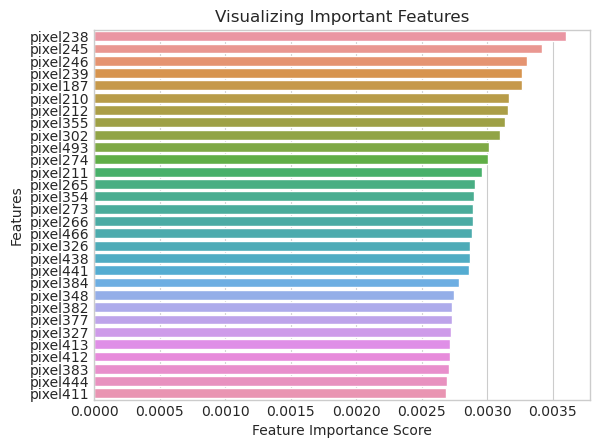

In [40]:
# Creating a bar plot
sns.barplot(x=feature_imp.iloc[:30], y=feature_imp.iloc[:30].index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Display Least Important Features

In [41]:
feature_imp_df_min = feature_imp_df.sort_values(by=['Importance'],ascending=True)
display(feature_imp_df_min.head(30))

,Importance
pixel39,0.000232
pixel18,0.000257
pixel12,0.000272
pixel40,0.000280
pixel67,0.000288
pixel11,0.000290
pixel19,0.000291
pixel68,0.000312
pixel16,0.000328
pixel15,0.000329


### Diference between the most important and least important feature/pixel

In [42]:
least = feature_imp_df_min.iloc[0,:]
display(least)
most = feature_imp_df.iloc[0,:]
display(most)
difference = most['Importance'] - least['Importance']
print('Difference in Importance: ' + str(difference))

Importance    0.000232
Name: pixel39, dtype: float64

Importance    0.003606
Name: pixel238, dtype: float64

Difference in Importance: 0.003373809400145029


# Statistical Output Format
Function used to structure the performance metrics in a table format

In [14]:
def structure_data(precision,accuracy,f1score, recall):
    precision = precision
    accuracy = accuracy
    f1score = f1score
    recall = recall
    statistical_results = [precision,accuracy,f1score, recall]
    return statistical_results

# Multi Layer Perceptron Classification
* MLP stands for Multi-Layer Perceptron, which is a type of artificial neural network commonly used in machine learning and deep learning.
* MLPs consist of multiple layers of interconnected nodes called neurons. These neurons are organized into input, hidden, and output layers, with each neuron being connected to neurons in the previous and subsequent layers.
* MLPs are capable of learning complex patterns and relationships in data through a process known as backpropagation. They are widely used for tasks such as classification, regression, and pattern recognition.

### Relevance for MultiClass Classification
MLP is well-suited for classification tasks due to its ability to learn and model complex non-linear relationships in data, allowing it to effectively distinguish between different classes and make accurate predictions.

## Target Hyperparameters
Target Hyperparameters to tune as part of this notebook. Be mindful there are more hyperparameters that can be tuned on MLP but are out of scope of this notebook due to computational complexity.

In [15]:
# Epochs 
epochs = [15, 30]
optimizers= ['sgd','adam']
#Preprocessing options
scaler = [StandardScaler(),None]

## Model Training and Evaluation - MLP Classification Model

In [16]:
num_neurons_basic = 100
print("Default number of neurons: " + str(num_neurons_basic))
# Function to create model, required for KerasClassifier
def create_model(dim=784,optimizer = 'adam',num_neurons=num_neurons_basic,activation ='relu'):
    model = Sequential()
    model.add(Dense(num_neurons,input_dim=dim,activation=activation))
    model.add(Dense(num_neurons,activation=activation))
    model.add(Dense(25,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model
model = create_model()
display(model.summary())

Default number of neurons: 100
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
Total params: 91,125
Trainable params: 91,125
Non-trainable params: 0
_________________________________________________________________


None

In [17]:
def compute_MLP_with_Classifier(flag=0,dim=784,
                              trainX_data = None, trainY_data = None,
                              testX_data = None,testY_data = None, 
                              scaler = None,cross_validation = None,batch_size=32,epochs=15,verbose=1,num_neurons_param=100,
                           optimizer_func='adam',activation_func='relu'):
# Init the MLP Classification Estimator with the hyperparameterts
    keras_classification_model = KerasClassifier(model=create_model,epochs=epochs,num_neurons=num_neurons_param,optimizer=optimizer_func,activation=activation_func,batch_size=batch_size,verbose=verbose)
    seed = 7
    np.random.seed(seed)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,keras_classification_model)
    else:
        #Use SKLearnn KNN Classification Default Estimator
        main_estimator = keras_classification_model
    # Fit and Predict the results of the testing data features using cross-validation
    predict_test = cross_val_predict(main_estimator,trainX_data,trainY_data,cv = cross_validation)
    #Compute Classification performance details
    matrix = confusion_matrix(trainY_data, predict_test)
    report = classification_report(trainY_data, predict_test,output_dict=True)
    accuracy = accuracy_score(trainY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    statistics = pd.DataFrame(report).transpose()
    if flag == 2:
        error_dataframe = pd.DataFrame({'Actual': trainY_data, 'Predicted':predict_test})
    else:
        error_dataframe = pd.DataFrame({'Actual': trainY_data.flatten(), 'Predicted':predict_test.flatten()})
    if flag == 1:
        print("Confusion Matrix")
        print(matrix)
        print("Confusion Matrix Graphical Visualization")
        disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
        disp.plot()
        plt.show()
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
    error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
    result = pd.DataFrame(Y_train,columns=["Label"]).join(error)
    return structure_data(statistics['precision'].mean(),accuracy,statistics['f1-score'].mean(), statistics['recall'].mean())

## Training Phase
In this phase, the training set will be used to train the model and cross-validation technique will be applied to evaluate the model to reach the best performing MLP model

### Find Optimal Folds in k-Fold Cross Validation
Divide data into Training and Test subsets.
* Divide Training data into K subsets (K-fold).
* Use K-1 subsets for training and the remaining subset for CV.
* The final validation error is the average CV error of K experiments.
* Choose the best model /hyper-parameter the one that minimise the average CV error.

Running CV number 2
Epoch 1/15
429/429 [==============================] - 3s 4ms/step - loss: 0.7971 - accuracy: 0.7860
Epoch 2/15
429/429 [==============================] - 2s 4ms/step - loss: 0.0503 - accuracy: 0.9944
Epoch 3/15
429/429 [==============================] - 2s 4ms/step - loss: 0.0098 - accuracy: 0.9996
Epoch 4/15
429/429 [==============================] - 2s 4ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 5/15
429/429 [==============================] - 2s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 6/15
429/429 [==============================] - 2s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 7/15
429/429 [==============================] - 2s 4ms/step - loss: 8.5855e-04 - accuracy: 1.0000
Epoch 8/15
429/429 [==============================] - 2s 4ms/step - loss: 5.9337e-04 - accuracy: 1.0000
Epoch 9/15
429/429 [==============================] - 2s 4ms/step - loss: 4.2284e-04 - accuracy: 1.0000
Epoch 10/15
429/429 [==============================] - 2s 4ms/step -

,precision,accuracy,f1-score,recall,folds
0,1.000000,1.000000,1.000000,1.000000,2
1,1.000000,1.000000,1.000000,1.000000,3
2,1.000000,1.000000,1.000000,1.000000,4
3,1.000000,1.000000,1.000000,1.000000,5
6,1.000000,1.000000,1.000000,1.000000,8
5,0.999965,0.999964,0.999964,0.999963,7
4,0.999366,0.999381,0.999386,0.999407,6
7,0.994446,0.994354,0.994486,0.994555,9
8,0.986913,0.986851,0.986866,0.986922,10


Number of Folds:  2


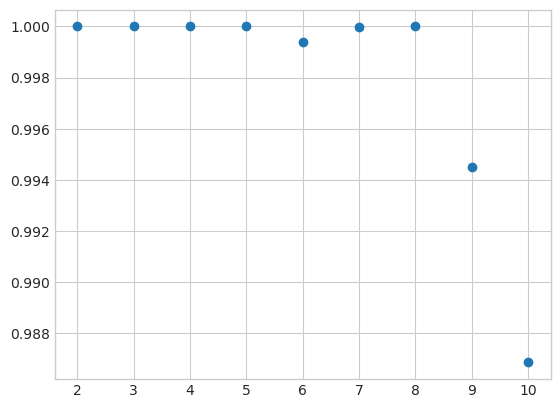

In [48]:
statistical_cols = ['precision','accuracy','f1-score','recall','folds']
cross_validation_list = np.arange(2,11)
results = list()
for cv in cross_validation_list:
    print("Running CV number " + str(cv))
    result = compute_MLP_with_Classifier(trainX_data=X_train,trainY_data=Y_train.ravel(),scaler=StandardScaler(),cross_validation = cv)
    result.append(cv)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['folds'],statistics['f1-score'])
selected_fold = statistics.sort_values(by=['f1-score'],ascending=False)['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

In [18]:
selected_fold = 8

### Confusion Matrix of best k Fold cross validation
Visualization of the confusion matrix of the best K Fold cross validation split

* Confusion matrix helps to visualize the performance of the model
* The diagonal elements represent the number of points for which the predicted label is equal to the true label
* Off-diagonal elements are those that are mislabeled by the classifier.
* The higher the diagonal values of the confusion matrix the better, indicating many co

Epoch 1/15
751/751 [==============================] - 3s 3ms/step - loss: 0.4747 - accuracy: 0.8748
Epoch 2/15
751/751 [==============================] - 2s 3ms/step - loss: 0.0084 - accuracy: 0.9999
Epoch 3/15
751/751 [==============================] - 2s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 4/15
751/751 [==============================] - 2s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 5/15
751/751 [==============================] - 2s 3ms/step - loss: 5.3886e-04 - accuracy: 1.0000
Epoch 6/15
751/751 [==============================] - 2s 3ms/step - loss: 2.9874e-04 - accuracy: 1.0000
Epoch 7/15
751/751 [==============================] - 2s 3ms/step - loss: 1.7934e-04 - accuracy: 1.0000
Epoch 8/15
751/751 [==============================] - 2s 3ms/step - loss: 1.0957e-04 - accuracy: 1.0000
Epoch 9/15
751/751 [==============================] - 2s 3ms/step - loss: 7.0083e-05 - accuracy: 1.0000
Epoch 10/15
751/751 [==============================] - 2s 3ms/step - loss: 4.379

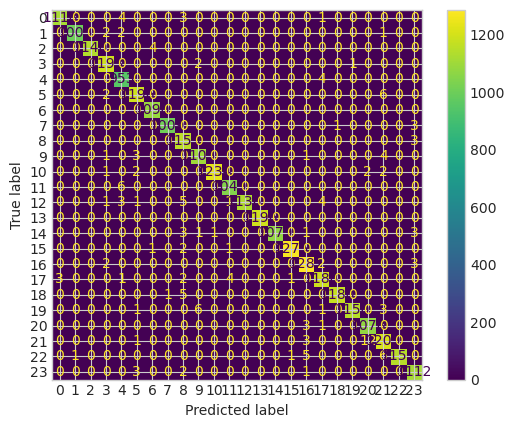

,precision,recall,f1-score,support
0,0.997324,0.992895,0.995105,1126.000000
1,0.999006,0.995050,0.997024,1010.000000
2,1.000000,0.996503,0.998249,1144.000000
3,0.992512,0.997492,0.994996,1196.000000
4,0.983488,0.995820,0.989616,957.000000
5,0.990886,0.993355,0.992119,1204.000000
6,0.995434,1.000000,0.997712,1090.000000
7,0.999010,0.996051,0.997528,1013.000000
8,0.981372,0.997418,0.989330,1162.000000
10,0.991921,0.991921,0.991921,1114.000000


,Actual,Predicted
0,3,3
1,6,6
2,2,2
3,2,2
4,13,13
...,...,...
27450,13,13
27451,23,23
27452,18,18
27453,17,17


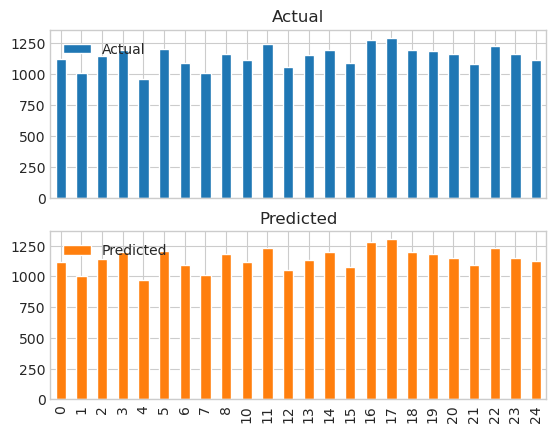

In [19]:
result = compute_MLP_with_Classifier(flag=1,trainX_data=X_train,trainY_data=Y_train.ravel(),scaler=StandardScaler(),cross_validation = selected_fold)

## Fine-Tune the Model
Here instead we're doing the same thing as a GridSearchCV would do. Nonetheless, we're using this approach to allow for preprocessing

In [ ]:
best_estimator = None
results = list()
palette = plt.get_cmap('Set1')
grid_results = list()
for sclr in scaler:
    for optimizer in optimizers:
        for epoch in epochs:
            print("Training " + str(epoch) + "| " + str(optimizer) + "| " + str(sclr))
            result = compute_MLP_with_Classifier(trainX_data=X_train,
                                                 trainY_data=Y_train.ravel(),
                                                 scaler=sclr,
                                                 epochs= epoch,
                                                 optimizer_func = optimizer,
                                                 cross_validation = selected_fold,
                                                 verbose=0)
            result.append(optimizer)
            result.append(epoch)
            result.append(sclr)
            results.append(result)

In [33]:
statistical_cols = ['precision','accuracy','f1-score','recall','optimizer','epochs','scaler']
best_results = pd.DataFrame(columns=statistical_cols,data=results).sort_values(by=['f1-score'],ascending=False)
display(best_results)

,precision,accuracy,f1-score,recall,optimizer,epochs,scaler
0,1.000000,1.000000,1.000000,1.000000,sgd,15,StandardScaler()
2,1.000000,1.000000,1.000000,1.000000,adam,15,StandardScaler()
3,1.000000,1.000000,1.000000,1.000000,adam,30,StandardScaler()
1,0.999671,0.999672,0.999678,0.999686,sgd,30,StandardScaler()
7,0.754391,0.507194,0.584600,0.506117,adam,30,None
5,0.819718,0.260572,0.337795,0.257119,sgd,30,None
4,0.630200,0.183792,0.209245,0.179993,sgd,15,None
6,0.697972,0.151521,0.181398,0.147117,adam,15,None


## Best MLP Model
Given the cross-validation results, these are the best hyperparameters of the MLP model after parameter tuning. We will use adam as it contains both 15 and 30 epochs with greater accuracy

In [37]:
# Merge inputs and targets
scaler = StandardScaler()
inputs = scaler.fit_transform(X_train)
targets = Y_train.ravel()
histories = list()

for train, test in kfold.split(inputs, targets):
    # Compile the model
    model = create_model(optimizer='adam')

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {selected_fold} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
          batch_size=32,
          epochs=30, validation_data=(inputs[test],targets[test]),
          verbose=1)
    histories.append(history.history)

------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/30
751/751 [==============================] - 4s 5ms/step - loss: 0.4826 - accuracy: 0.8694 - val_loss: 0.0669 - val_accuracy: 0.9866
Epoch 2/30
751/751 [==============================] - 3s 4ms/step - loss: 0.0163 - accuracy: 0.9978 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 3/30
751/751 [==============================] - 3s 4ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4/30
751/751 [==============================] - 3s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 8.5750e-04 - val_accuracy: 1.0000
Epoch 5/30
751/751 [==============================] - 3s 4ms/step - loss: 5.7738e-04 - accuracy: 1.0000 - val_loss: 4.8759e-04 - val_accuracy: 1.0000
Epoch 6/30
751/751 [==============================] - 3s 4ms/step - loss: 3.4110e-04 - accuracy: 1.0000 - val_loss: 3.0575e-04 - val_accuracy: 1.0000
Epoch 7/30
751/751 [===========

### Acc/Loss Plot for K-Fold
Computes the mean accuracy, validation accuracy, loss, and validation loss for each fold split of cross validation for 8 folds

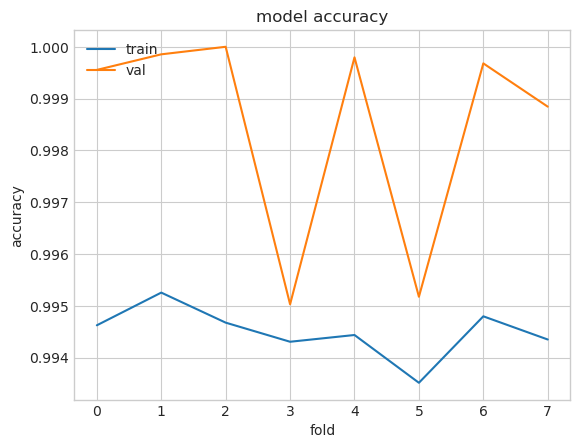

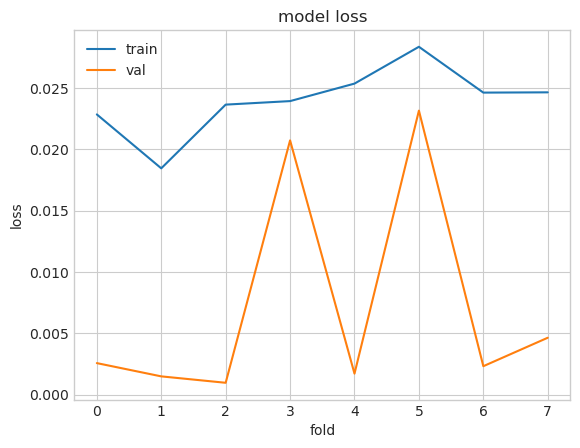

In [44]:
train_loss = list()
train_acc = list()
val_loss = list()
val_acc = list()
for history in histories:
    train_loss.append(np.mean(history['loss']))
    val_loss.append(np.mean(history['val_loss']))
    train_acc.append(np.mean(history['accuracy']))
    val_acc.append(np.mean(history['val_accuracy']))
# summarize history for accuracy
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('fold')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('fold')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Testing Phase - Generalization Error
Test the best trained model with data it never saw before (test dataset). A confusion matrix and accuracy results are presented

### Predict on new data
Let's predict the unseen data on the testing dataset using the model with the best hyperparameters

In [127]:
model = create_model(optimizer='adam')
training_inputs = scaler.fit_transform(X_train)
training_targets = Y_train.ravel()
# Fit data to model
history = model.fit(training_inputs, training_targets,
      batch_size=32,
      epochs=30,
      verbose=1)
test_inputs = scaler.fit_transform(X_test)
test_targets = Y_test.ravel()
predict_test = model.predict(test_inputs)
predictions=np.argmax(predict_test,axis=1)
display(predictions)

Epoch 1/30
858/858 [==============================] - 5s 5ms/step - loss: 0.4317 - accuracy: 0.8844
Epoch 2/30
858/858 [==============================] - 4s 5ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 3/30
858/858 [==============================] - 4s 5ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 4/30
858/858 [==============================] - 4s 5ms/step - loss: 7.9014e-04 - accuracy: 1.0000
Epoch 5/30
858/858 [==============================] - 4s 5ms/step - loss: 4.0068e-04 - accuracy: 1.0000
Epoch 6/30
858/858 [==============================] - 4s 4ms/step - loss: 2.2335e-04 - accuracy: 1.0000
Epoch 7/30
858/858 [==============================] - 4s 5ms/step - loss: 1.2546e-04 - accuracy: 1.0000
Epoch 8/30
858/858 [==============================] - 4s 4ms/step - loss: 7.4689e-05 - accuracy: 1.0000
Epoch 9/30
858/858 [==============================] - 4s 4ms/step - loss: 4.3521e-05 - accuracy: 1.0000
Epoch 10/30
858/858 [==============================] - 4s 4ms/step - loss: 2

array([ 6,  5, 10, ...,  2,  4,  2])

### Performance Metrics
Set classification performance metrics

In [128]:
#Compute Classification performance details
matrix = confusion_matrix(test_targets, predictions)
report = classification_report(test_targets, predictions,output_dict=True)
accuracy = accuracy_score(test_targets,predictions)
# Structure data to statistics
statistical_array = list()
statistics = pd.DataFrame(report).transpose()
error_dataframe = pd.DataFrame({'Actual':test_targets, 'Predicted':predictions})

### Performance Outputs
Outputs the Confusion Matrix and related visualization

Confusion Matrix
[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 432   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 289   0   0  21   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 456   0   0   0   0   0   0   0   0   0   0   0   0  42
    0   0   0   0   0   0]
 [  0   0   0   0   0 227   0   0   0   0  20   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 286  21   0   0   3   0   0   0   0  20   0   0
   18   0   0   0   0   0]
 [ 19   0   0   0   0   0  20 385   0   0   0   0   0   0   0   0   0   0
    0  12   0   0   0   0]
 [  0   0   0   0   0   0   0   0 205  21  21   0   1   0   0   0   0   0
    0   0   0   0   0  40]
 [  0   0   0   0   0  10   0   0  21 259   0   0   0   0   0   0  21   0


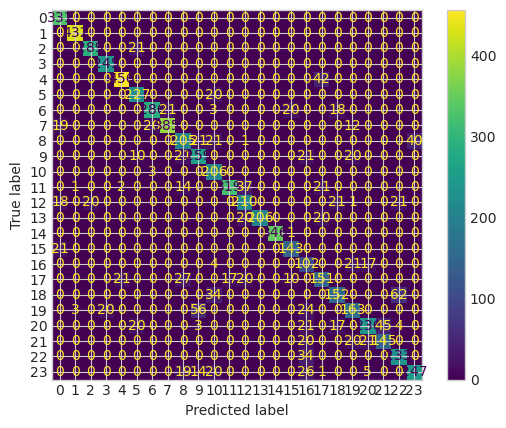

,precision,recall,f1-score,support
0,0.850900,1.000000,0.919444,331.000000
1,0.990826,1.000000,0.995392,432.000000
2,0.935275,0.932258,0.933764,310.000000
3,0.924528,1.000000,0.960784,245.000000
4,0.951983,0.915663,0.933470,498.000000
5,0.816547,0.919028,0.864762,247.000000
6,0.925566,0.821839,0.870624,348.000000
7,0.948276,0.883028,0.914489,436.000000
8,0.716783,0.711806,0.714286,288.000000
10,0.733711,0.782477,0.757310,331.000000


,Actual,Predicted
0,6,6
1,5,5
2,10,10
3,0,0
4,3,3
...,...,...
7167,1,1
7168,12,8
7169,2,2
7170,4,4


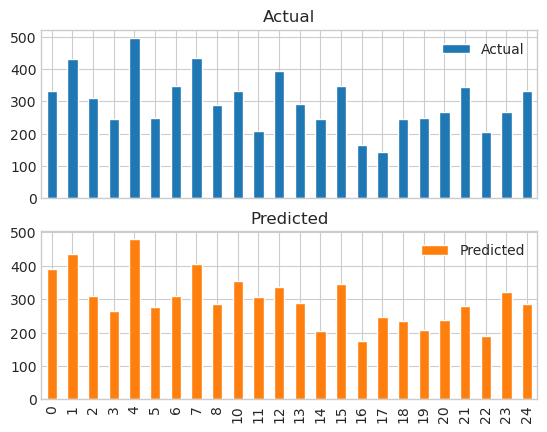

In [129]:
print("Confusion Matrix")
print(matrix)
print("Confusion Matrix Graphical Visualization:")
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.show()
display(statistics)
display(error_dataframe)
error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
result = pd.DataFrame(Y_train,columns=["Label"]).join(error)

## MLP Metrics
Table format presentation of the Random Forest actual performance metrics on the testing dataset

In [130]:
#overall_models_performance = {}
results = [structure_data(statistics['precision'].mean(),accuracy,statistics['f1-score'].mean(), statistics['recall'].mean())]
statistical_cols = ['precision','accuracy','f1-score','recall']
statistics = pd.DataFrame(columns=statistical_cols,data=results)
overall_models_performance['MLP'] = results
display(statistics.sort_values(by=['f1-score'],ascending=False))

,precision,accuracy,f1-score,recall
0,0.819581,0.832962,0.816352,0.823273


# K-Nearest Neighbors Classification
* KNN makes predictions based on the k-nearest neighbors of a new input instance.
* KNN is non-parametric, meaning it does not make assumptions about the distribution of the data.
* KNN is lazy, meaning it does not build a model from the training data but rather stores the training data and uses it for predictions.

### Relevance for MultiClass Classification
KNN is relevant for multiclass classification problems because it can classify instances into multiple classes based on the k-nearest neighbors of the input instance. Specifically, KNN considers the class labels of the k-nearest neighbors and assigns the most frequent class label as the predicted class for the input instance. Therefore, KNN can be applied to datasets with multiple classes and can accurately classify instances into the appropriate class, making it a useful algorithm for multiclass classification problems.

## Target Hyperparameters
Target Hyperparameters to tune as part of this notebook. Be mindful there are more hyperparameters that can be tuned on KNN but are out of scope of this notebook due to computational complexity.

In [49]:
distance_metris = ["euclidean", "manhattan", "canberra", "braycurtis"]
weights = ["uniform","distance"]
#Preprocessing options
scaler = [StandardScaler(),None]
knn_basic = KNeighborsClassifier()

## Default KNN Hyperparameters
Default kNN hyperparameters defined in by Scikit Learn KNNClassifier class

In [50]:
print("Default Knn Hyperparameters")
default_params = knn_basic.get_params()
display(pd.DataFrame(default_params,index=[1]))

Default Knn Hyperparameters


,algorithm,leaf_size,metric,metric_params,n_jobs,n_neighbors,p,weights
1,auto,30,minkowski,None,None,5,2,uniform


## KNN Model
Function used to train and evaluate the KNN classifier model. The function is flexible to accept cross_validation and feature scaling (Standard Scaler for example)

In [51]:
def compute_KNN_with_Classifier(flag = 0,trainX_data = None,trainY_data = None,scaler = None,cross_validation = None,n_neighbors=5):
    # Init the KNN Classification Estimator with the hyperparameters
    knn_classifier_estimator = KNeighborsClassifier(n_neighbors)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,knn_classifier_estimator)
    else:
        #Use SKLearnn KNN Classification Default Estimator
        main_estimator = knn_classifier_estimator
    # Fit and Predict the results of the testing data features using cross-validation
    predict_test = cross_val_predict(main_estimator,trainX_data,trainY_data,cv = cross_validation)
    #Compute Classification performance details
    matrix = confusion_matrix(trainY_data, predict_test)
    report = classification_report(trainY_data, predict_test,output_dict=True)
    accuracy = accuracy_score(trainY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    statistics = pd.DataFrame(report).transpose()
    if flag == 2:
        error_dataframe = pd.DataFrame({'Actual': trainY_data, 'Predicted':predict_test})
    else:
        error_dataframe = pd.DataFrame({'Actual': trainY_data.flatten(), 'Predicted':predict_test.flatten()})
    if flag == 1:
        print("Confusion Matrix")
        print(matrix)
        print("Confusion Matrix Graphical Visualization")
        disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
        disp.plot()
        plt.show()
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
    error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
    result = pd.DataFrame(Y_train,columns=["Label"]).join(error)
    return structure_data(statistics['precision'].mean(),accuracy,statistics['f1-score'].mean(), statistics['recall'].mean())

## Training Phase
In this phase, the training set will be used to train the model and cross-validation technique will be applied to evaluate the model to reach the best performing KNN model

### Find Optimal Folds in k-Fold Cross Validation
Divide data into Training and Test subsets.
* Divide Training data into K subsets (K-fold).
* Use K-1 subsets for training and the remaining subset for CV.
* The final validation error is the average CV error of K experiments.
* Choose the best model /hyper-parameter the one that minimise the average CV error.

,precision,accuracy,f1-score,recall,folds
8,0.996507,0.996503,0.996492,0.996488,10
7,0.996484,0.996503,0.996485,0.996495,9
6,0.996195,0.996212,0.996200,0.996213,8
5,0.995755,0.995775,0.995769,0.995796,7
4,0.995211,0.995229,0.995228,0.995260,6
3,0.994729,0.994719,0.994726,0.994737,5
2,0.993706,0.993735,0.993723,0.993758,4
1,0.991453,0.991441,0.991459,0.991500,3
0,0.983472,0.983500,0.983478,0.983602,2


Number of Folds:  10


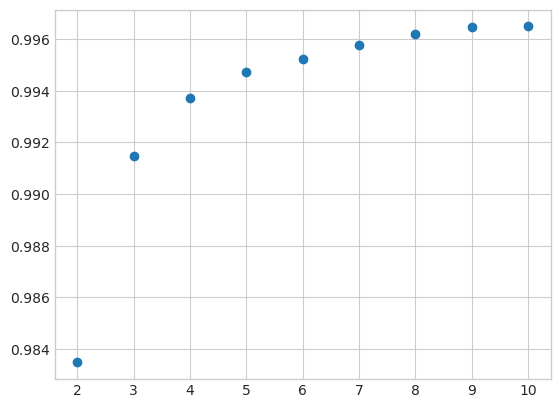

In [51]:
statistical_cols = ['precision','accuracy','f1-score','recall','folds']
cross_validation_list = np.arange(2,11)
results = list()
for cv in cross_validation_list:
    result = compute_KNN_with_Classifier(trainX_data=X_train,trainY_data=Y_train.ravel(),scaler=StandardScaler(),cross_validation = cv)
    result.append(cv)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['folds'],statistics['f1-score'])
selected_fold = statistics.sort_values(by=['f1-score'],ascending=False)['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

In [52]:
selected_fold = 10

### Confusion Matrix of best k Fold cross validation
Visualization of the confusion matrix of the best K Fold cross validation split

* Confusion matrix helps to visualize the performance of the model
* The diagonal elements represent the number of points for which the predicted label is equal to the true label
* Off-diagonal elements are those that are mislabeled by the classifier.
* The higher the diagonal values of the confusion matrix the better, indicating many co

Confusion Matrix
[[1126    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0 1144    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 1196    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  956    0    0    0    0    0    0    1    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    2    0 1201    0    0    0    0    0    0    0    0
     0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0 1089    0    0    0    0    0    0    0
     0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    5 1008    0    0    0    0    0    0
     0    0    0    0    0    0    0

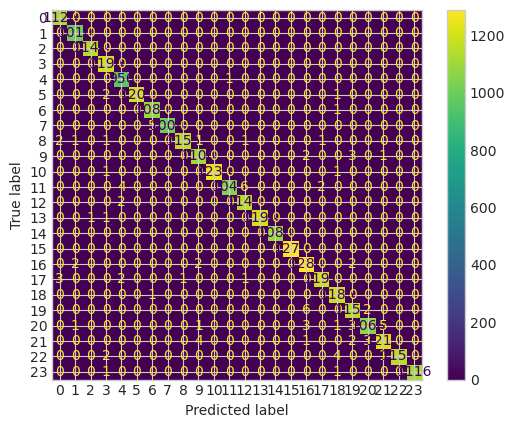

,precision,recall,f1-score,support
0,0.995579,1.000000,0.997785,1126.000000
1,0.996055,1.000000,0.998024,1010.000000
2,0.999127,1.000000,0.999563,1144.000000
3,0.993355,1.000000,0.996667,1196.000000
4,0.991701,0.998955,0.995315,957.000000
5,1.000000,0.997508,0.998753,1204.000000
6,0.994521,0.999083,0.996796,1090.000000
7,1.000000,0.995064,0.997526,1013.000000
8,0.999135,0.993976,0.996549,1162.000000
10,0.992832,0.994614,0.993722,1114.000000


,Actual,Predicted
0,3,3
1,6,6
2,2,2
3,2,2
4,13,13
...,...,...
27450,13,13
27451,23,23
27452,18,18
27453,17,17


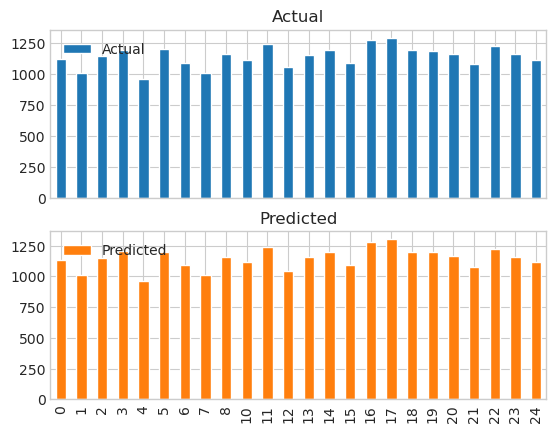

In [52]:
result = compute_KNN_with_Classifier(flag=1,trainX_data=X_train,trainY_data=Y_train.ravel(),scaler=StandardScaler(),cross_validation = selected_fold)

## Fine-Tune the Model
Here we are using a RandomizedSearchCV instead of a GridSearchCV given the benefits associated with RandomizedSearchCV:
* Suppose a hyperparameter does not actually make much difference, but you don’t know it yet. If it has 10 possible values and you add it to your grid search, then training will take 10 times longer. But if you add it to a random search, it will not make any difference.
* If there are 6 hyperparameters to explore, each with 10 possible values, then grid search offers no other choice than training the model a million times, whereas random search can always run for any number of iterations you choose.
* For bigger datasets, this method is prefered against GridSearchCV

In [54]:
best_estimator = None
results = list()
palette = plt.get_cmap('Set1')
grid_results = list()
tuned_parameters = {
    'knn__n_neighbors': range(3,21),
    'knn__metric':distance_metris,
    'knn__weights':weights
}
scores = ['f1_macro']
for score in scores:
    for sclr in scaler:
        print("# Tuning hyper-parameters for %s" % score)
        print()
        trainX_data = X_train
        if scaler is not None:
            # Make pipeline using scaler transformation
            pipe = Pipeline([('standardizer', sclr), ('knn', KNeighborsClassifier())])
        else:
            #Use SKLearnn KNN Classification Default Estimator
            pipe = KNeighborsClassifier()
        clf = RandomizedSearchCV(pipe, tuned_parameters,n_iter=1,cv=selected_fold,scoring=score,verbose=2, n_jobs = -1)
        clf.fit(X_train,Y_train.ravel())
        clf.best_params_['scaler'] = sclr
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        best_estimator = clf.best_estimator_
        results.append(clf.best_params_)
randomsearchcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(randomsearchcv_results)

# Tuning hyper-parameters for f1_macro

Fitting 10 folds for each of 1 candidates, totalling 10 fits
# Tuning hyper-parameters for f1_macro

Fitting 10 folds for each of 1 candidates, totalling 10 fits


,knn__weights,knn__n_neighbors,knn__metric,scaler,score,best_score
0,uniform,5,euclidean,StandardScaler(),f1_macro,0.996492
1,distance,16,euclidean,None,f1_macro,0.996324


## Best KNN Model
Given the cross-validation results, these are the best hyperparameters of the KNN model after parameter tuning

In [55]:
randomsearchcv_results.head(1)

,knn__weights,knn__n_neighbors,knn__metric,scaler,score,best_score
0,uniform,5,euclidean,StandardScaler(),f1_macro,0.996492


## Testing Phase - Generalization Error
Test the best trained model with data it never saw before (test dataset). A confusion matrix and accuracy results are presented

### Predict on new data
Let's predict the unseen data on the testing dataset using the model with the best hyperparameters

In [67]:
scaler = StandardScaler()
training_inputs = scaler.fit_transform(X_train)
training_targets = Y_train.ravel()
test_inputs = scaler.fit_transform(X_test)
test_targets = Y_test.ravel()
model = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
model.fit(training_inputs,training_targets)
predict_test = model.predict(test_inputs)

### Performance Metrics
Set classification performance metrics

In [69]:
#Compute Classification performance details
matrix = confusion_matrix(test_targets, predict_test)
report = classification_report(test_targets, predict_test,output_dict=True)
accuracy = accuracy_score(test_targets,predict_test)
# Structure data to statistics
statistical_array = list()
statistics = pd.DataFrame(report).transpose()
error_dataframe = pd.DataFrame({'Actual': test_targets, 'Predicted':predict_test})

### Performance Outputs
Outputs the Confusion Matrix and related visualization

Confusion Matrix
[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 404   0  20   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   3   2   0   0]
 [  0   0 310   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   2   0 235   0   0   0   0   0   0   0   0   0   0   0   0   7   0
    1   0   0   0   0   0]
 [  0   0   0   0 480   0   0   0   0   0   0   0   2   0   0   0   0  16
    0   0   0   0   0   0]
 [  0   0   0   1   0 233   0   0   0   0   1   0   0   0   0   0   0   0
    9   0   0   3   0   0]
 [  0   0   0   0   0   0 327   3   0   0   0   0   0   0   0   0   0   0
   18   0   0   0   0   0]
 [  0   0   0   0   0   0  11 424   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0]
 [ 15   3   0   7  14   0   4   0 197   0   0   0   4   0   0   0   0  21
    2   0   1   0   0  20]
 [  0   2   0  18   0   0   0   0   5 201   0   0   0   0   1   1  31   0


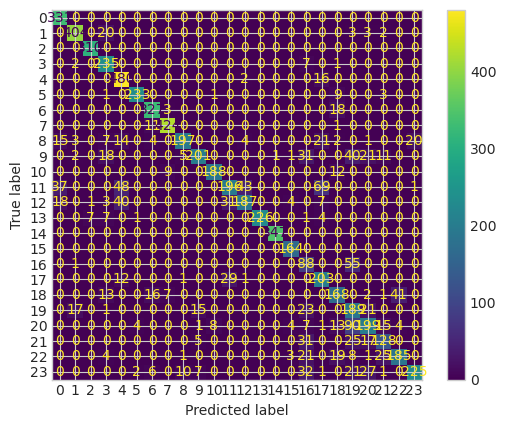

,precision,recall,f1-score,support
0,0.825436,1.000000,0.904372,331.000000
1,0.941725,0.935185,0.938444,432.000000
2,0.974843,1.000000,0.987261,310.000000
3,0.760518,0.959184,0.848375,245.000000
4,0.808081,0.963855,0.879121,498.000000
5,0.970833,0.943320,0.956879,247.000000
6,0.898352,0.939655,0.918539,348.000000
7,0.957111,0.972477,0.964733,436.000000
8,0.920561,0.684028,0.784861,288.000000
10,0.877729,0.607251,0.717857,331.000000


,Actual,Predicted
0,6,6
1,5,5
2,10,21
3,0,0
4,3,3
...,...,...
7167,1,1
7168,12,12
7169,2,2
7170,4,4


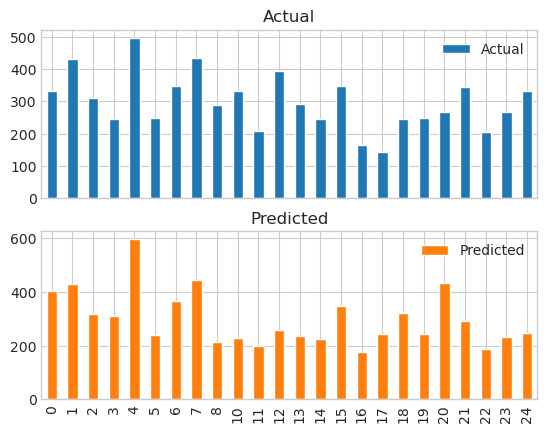

In [70]:
print("Confusion Matrix")
print(matrix)
print("Confusion Matrix Graphical Visualization:")
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.show()
display(statistics)
display(error_dataframe)
error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
result = pd.DataFrame(Y_train,columns=["Label"]).join(error)

## KNN Metrics
Table format presentation of the KNN actual performance metrics on the testing dataset

In [71]:
results = [structure_data(statistics['precision'].mean(),accuracy,statistics['f1-score'].mean(), statistics['recall'].mean())]
statistical_cols = ['precision','accuracy','f1-score','recall']
statistics = pd.DataFrame(columns=statistical_cols,data=results)
overall_models_performance['KNN'] = results
display(statistics.sort_values(by=['f1-score'],ascending=False))

,precision,accuracy,f1-score,recall
0,0.816609,0.813581,0.803231,0.806971


# Logistic Regression Classification
* Logistic regression is a statistical method used for binary classification problems, where the target variable has two classes.
* It models the probability of the positive class (or the probability of the negative class, depending on the chosen class as the response) as a function of one or more independent variables, using a logistic or sigmoidal function.

### Relevance for MultiClass Classification
* It can be extended to handle more than two classes through techniques such as one-vs-all or softmax regression.
* It is computationally efficient and requires relatively little memory, making it suitable for large datasets.
* It provides interpretable results and can be used to estimate the probability of each class, allowing for probabilistic classification and uncertainty quantification.


## Target Hyperparameters
Target Hyperparameters to tune as part of this notebook. Be mindful there are more hyperparameters that can be tuned on Logistical Regression but are out of scope of this notebook due to computational complexity.

In [82]:
C = [0.01,0.1,1]
lr_basic = LogisticRegression()
#Preprocessing options
scaler = [StandardScaler(),None]

## Default Logistic Regression Hyperparameters
Default LR hyperparameters defined in by Scikit Learn LogisticRegression class

In [73]:
print("Default LR Hyperparameters")
default_params = lr_basic.get_params()
display(pd.DataFrame(default_params,index=[1]))

Default LR Hyperparameters


,C,class_weight,dual,fit_intercept,intercept_scaling,l1_ratio,max_iter,multi_class,n_jobs,penalty,random_state,solver,tol,verbose,warm_start
1,1.0,None,False,True,1,None,100,auto,None,l2,None,lbfgs,0.0001,0,False


## Logistic Regression Model
Function used to train and evaluate the LR classifier model. The function is flexible to accept cross_validation and feature scaling (Standard Scaler for example)

In [74]:
def compute_LR_with_Classifier(flag = 0,trainX_data = None,trainY_data = None,scaler = None,cross_validation = None):
    # Init the LR Classification Estimator with the hyperparameters
    lr_classifier_estimator = LogisticRegression(random_state=42,max_iter=700,n_jobs=-1)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,lr_classifier_estimator)
    else:
        #Use SKLearnn LR Classification Default Estimator
        main_estimator = lr_classifier_estimator
    # Fit and Predict the results of the testing data features using cross-validation
    predict_test = cross_val_predict(main_estimator,trainX_data,trainY_data,cv = cross_validation)
    #Compute Classification performance details
    matrix = confusion_matrix(trainY_data, predict_test)
    report = classification_report(trainY_data, predict_test,output_dict=True)
    accuracy = accuracy_score(trainY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    statistics = pd.DataFrame(report).transpose()
    if flag == 2:
        error_dataframe = pd.DataFrame({'Actual': trainY_data, 'Predicted':predict_test})
    else:
        error_dataframe = pd.DataFrame({'Actual': trainY_data.flatten(), 'Predicted':predict_test.flatten()})
    if flag == 1:
        print("Confusion Matrix")
        print(matrix)
        print("Confusion Matrix Graphical Visualization:")
        disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
        disp.plot()
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
    error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
    result = pd.DataFrame(Y_train,columns=["Label"]).join(error)
    return structure_data(statistics['precision'].mean(),accuracy,statistics['f1-score'].mean(), statistics['recall'].mean())

## Training Phase
In this phase, the training set will be used to train the model and cross-validation technique will be applied to evaluate the model to reach the best performing LR model

### Find Optimal Folds in k-Fold Cross Validation
Divide data into Training and Test subsets.
* Divide Training data into K subsets (K-fold).
* Use K-1 subsets for training and the remaining subset for CV.
* The final validation error is the average CV error of K experiments.
* Choose the best model /hyper-parameter the one that minimise the average CV error.

,precision,accuracy,f1-score,recall,folds
4,1.000000,1.000000,1.000000,1.000000,6
7,1.000000,1.000000,1.000000,1.000000,9
1,0.999963,0.999964,0.999963,0.999964,3
3,0.999962,0.999964,0.999962,0.999962,5
6,0.999962,0.999964,0.999962,0.999962,8
8,0.999962,0.999964,0.999962,0.999962,10
2,0.999930,0.999927,0.999928,0.999926,4
5,0.999929,0.999927,0.999926,0.999923,7
0,0.999825,0.999818,0.999820,0.999816,2


Number of Folds:  6


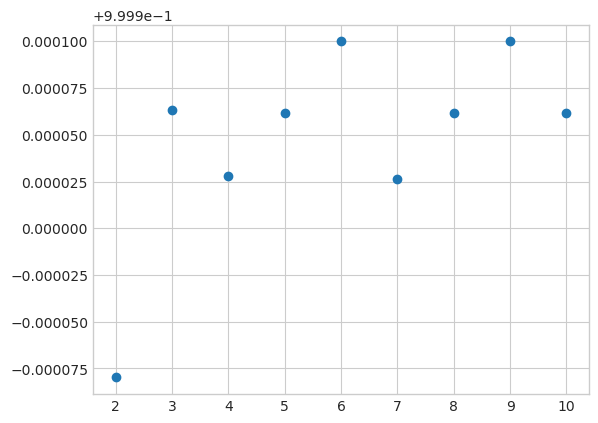

In [75]:
statistical_cols = ['precision','accuracy','f1-score','recall','folds']
cross_validation_list = np.arange(2,11)
results = list()
for cv in cross_validation_list:
    result = compute_LR_with_Classifier(trainX_data=X_train,trainY_data=Y_train.ravel(),scaler=StandardScaler(),cross_validation = cv)
    result.append(cv)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['folds'],statistics['f1-score'])
selected_fold = statistics.sort_values(by=['f1-score'],ascending=False)['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

### Confusion Matrix of best k Fold cross validation
Visualization of the confusion matrix of the best K Fold cross validation split

* Confusion matrix helps to visualize the performance of the model
* The diagonal elements represent the number of points for which the predicted label is equal to the true label
* Off-diagonal elements are those that are mislabeled by the classifier.
* The higher the diagonal values of the confusion matrix the better, indicating many co

In [79]:
selected_fold = 6

Confusion Matrix
[[1126    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0 1144    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 1196    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  957    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1204    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1090    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1013    0    0    0    0    0    0
     0    0    0    0    0    0    0

,precision,recall,f1-score,support
0,1.0,1.0,1.0,1126.0
1,1.0,1.0,1.0,1010.0
2,1.0,1.0,1.0,1144.0
3,1.0,1.0,1.0,1196.0
4,1.0,1.0,1.0,957.0
5,1.0,1.0,1.0,1204.0
6,1.0,1.0,1.0,1090.0
7,1.0,1.0,1.0,1013.0
8,1.0,1.0,1.0,1162.0
10,1.0,1.0,1.0,1114.0


,Actual,Predicted
0,3,3
1,6,6
2,2,2
3,2,2
4,13,13
...,...,...
27450,13,13
27451,23,23
27452,18,18
27453,17,17


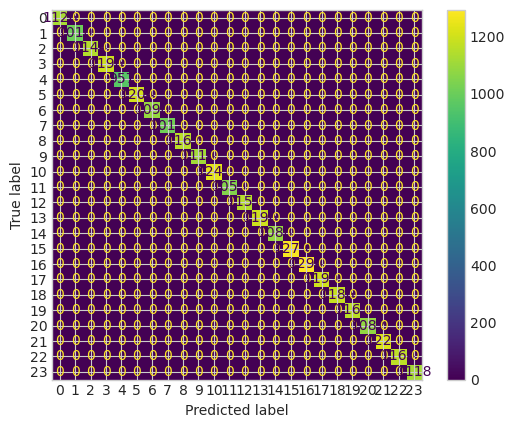

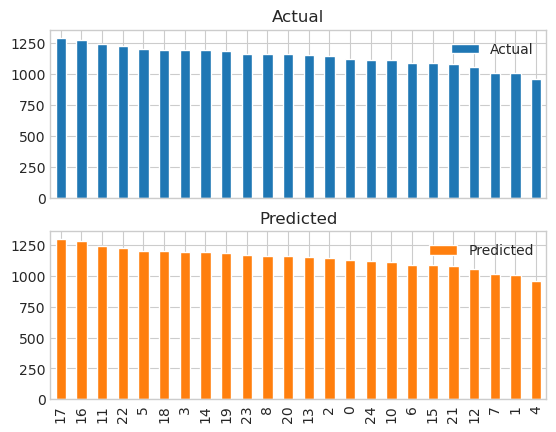

In [80]:
result = compute_LR_with_Classifier(flag=1,trainX_data=X_train,trainY_data=Y_train.ravel(),scaler=StandardScaler(),cross_validation = selected_fold)

## Fine-Tune the Model
Here we are using a RandomizedSearchCV instead of a GridSearchCV given the benefits associated with RandomizedSearchCV:

Suppose a hyperparameter does not actually make much difference, but you don’t know it yet. If it has 10 possible values and you add it to your grid search, then training will take 10 times longer. But if you add it to a random search, it will not make any difference.
If there are 6 hyperparameters to explore, each with 10 possible values, then grid search offers no other choice than training the model a million times, whereas random search can always run for any number of iterations you choose.
For bigger datasets, this method is prefered against GridSearchCV

In [85]:
best_estimator = None
grid_cv_results = None
results = list()
palette = plt.get_cmap('Set1')
grid_results = list()
hyperparameters = {
    'logisticregression__C': C # regularization strength,
}
scores = ['f1_macro']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    for sclr in scaler:
        if scaler is not None:
            # Make pipeline using scaler transformation
            pipe = Pipeline([('standardizer', sclr), ('logisticregression', LogisticRegression(max_iter=700))])
        else:
            #Use SKLearnn LR Classification Default Estimator
            pipe = LogisticRegression(max_iter=700)
        # create a randomized search object
        clf = RandomizedSearchCV(
            pipe, # pipeline to search over
            hyperparameters, # hyperparameters to search over
            cv=selected_fold, # cross-validation
            scoring=score, # metric to optimize,
            n_iter=1,
            n_jobs=-1, # use all available CPUs
            verbose =3,
            return_train_score=True
        )
        clf.fit(X_train,Y_train.ravel())
        if scaler is not None:
            grid_cv_results = clf.cv_results_
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['scaler'] = scaler
        best_estimator = clf.best_estimator_
        results.append(clf.best_params_)
randomsearchcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(randomsearchcv_results)

# Tuning hyper-parameters for f1_macro

Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,logisticregression__C,score,best_score
0,1.0,f1_macro,1.0
1,0.1,f1_macro,1.0


In [91]:
randomsearchcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(randomsearchcv_results)

,logisticregression__C,score,best_score,Scaler
0,1.0,f1_macro,1.0,StandardScaler()
1,0.1,f1_macro,1.0,None


In [93]:
display(grid_cv_results)

{'mean_fit_time': array([142.88922211]),
 'std_fit_time': array([32.31022629]),
 'mean_score_time': array([0.0460904]),
 'std_score_time': array([0.0099369]),
 'param_logisticregression__C': masked_array(data=[0.1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'logisticregression__C': 0.1,
   'score': 'f1_macro',
   'best_score': 1.0,
   'Scaler': 'None'}],
 'split0_test_score': array([1.]),
 'split1_test_score': array([1.]),
 'split2_test_score': array([1.]),
 'split3_test_score': array([1.]),
 'split4_test_score': array([1.]),
 'split5_test_score': array([1.]),
 'mean_test_score': array([1.]),
 'std_test_score': array([0.]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([1.]),
 'split1_train_score': array([1.]),
 'split2_train_score': array([1.]),
 'split3_train_score': array([1.]),
 'split4_train_score': array([1.]),
 'split5_train_score': array([1.]),
 'mean_train_score': array([1.]),
 'std_train_score': ar

## Best Logistic Regression Model
Given the cross-validation results, this are the best hyperparameters of the LR model after parameter tuning

In [95]:
randomsearchcv_results.head(1)

,logisticregression__C,score,best_score,Scaler
0,1.0,f1_macro,1.0,StandardScaler()


## Testing Phase - Generalization Error
Test the best trained model with data it never saw before (test dataset). A confusion matrix and accuracy results are presented

### Predict on new data
Let's predict the unseen data on the testing dataset using the model with the best hyperparameters

In [96]:
scaler = StandardScaler()
training_inputs = scaler.fit_transform(X_train)
training_targets = Y_train.ravel()
test_inputs = scaler.fit_transform(X_test)
test_targets = Y_test.ravel()
model = LogisticRegression(max_iter=700,C=1.0)
model.fit(training_inputs,training_targets)
predict_test = model.predict(test_inputs)

### Performance Metrics
Set classification performance metrics

In [97]:
#Compute Classification performance details
matrix = confusion_matrix(test_targets, predict_test)
report = classification_report(test_targets, predict_test,output_dict=True)
accuracy = accuracy_score(test_targets,predict_test)
# Structure data to statistics
statistical_array = list()
statistics = pd.DataFrame(report).transpose()
error_dataframe = pd.DataFrame({'Actual': test_targets, 'Predicted':predict_test})

### Performance Outputs
Outputs the Confusion Matrix and related visualization

Confusion Matrix
[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 370   0  20   0   0   0   0   0  19   0   0   0   0   0   0  14   0
    0   8   1   0   0   0]
 [  0   0 261   0   0  18   0   0   0   0   9   0   0   0   0   0   0   0
    0   0  19   3   0   0]
 [  0   0   0 228   0   0   0   0   0   0   9   0   0   0   0   0   7   0
    0   0   0   0   1   0]
 [  0   0   0   0 434   0   0   0   0   0   0   0  21   1   0   0   0  42
    0   0   0   0   0   0]
 [  0   0  18   0   0 223   0   0   0   0   3   0   0   0   0   0   0   0
    3   0   0   0   0   0]
 [  0   0   0   0   0   0 269   0   0   0   0   0   0   0   0  27   0   0
   40   0   0   0  12   0]
 [  0   0   0   0   0   0  42 283  21   0  20  21   0   0   0   0   0   0
    5  37   0   0   7   0]
 [  0   0   0   0   0   0   0  36 169  21   0   0   6   0   0   0  21   0
    0   0   0   0   0  35]
 [  0   0   0   0   0  21   0   0   1 140   0   0   0   0  22   0  57  19


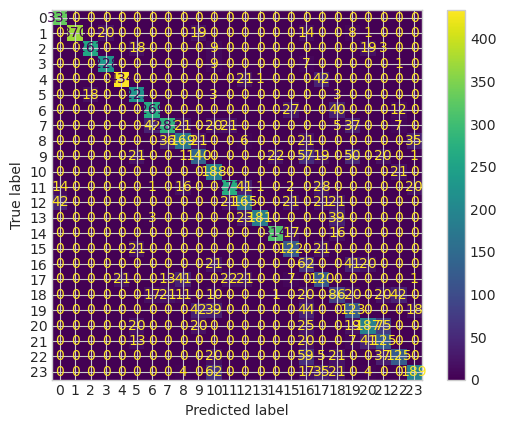

,precision,recall,f1-score,support
0,0.855297,1.000000,0.922006,331.000000
1,1.000000,0.856481,0.922693,432.000000
2,0.935484,0.841935,0.886248,310.000000
3,0.919355,0.930612,0.924949,245.000000
4,0.953846,0.871486,0.910808,498.000000
5,0.705696,0.902834,0.792185,247.000000
6,0.810241,0.772989,0.791176,348.000000
7,0.801700,0.649083,0.717364,436.000000
8,0.642586,0.586806,0.613430,288.000000
10,0.578512,0.422961,0.488656,331.000000


,Actual,Predicted
0,6,6
1,5,5
2,10,10
3,0,0
4,3,3
...,...,...
7167,1,17
7168,12,8
7169,2,2
7170,4,4


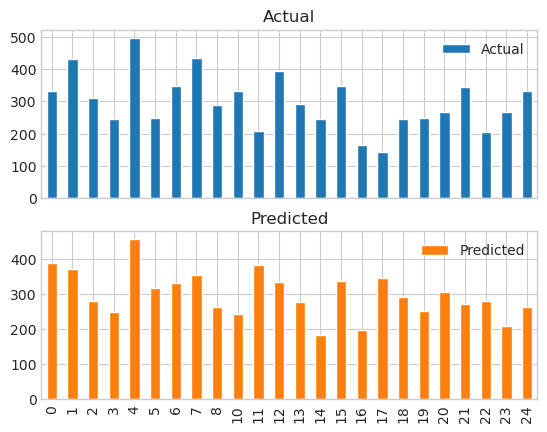

In [98]:
print("Confusion Matrix")
print(matrix)
print("Confusion Matrix Graphical Visualization:")
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.show()
display(statistics)
display(error_dataframe)
error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
result = pd.DataFrame(Y_train,columns=["Label"]).join(error)

## LR Metrics
Table format presentation of the LR actual performance metrics on the testing dataset

In [99]:
results = [structure_data(statistics['precision'].mean(),accuracy,statistics['f1-score'].mean(), statistics['recall'].mean())]
statistical_cols = ['precision','accuracy','f1-score','recall']
overall_models_performance['LR'] = results
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

,precision,accuracy,f1-score,recall
0,0.686402,0.692415,0.673743,0.679621


# Random Forest Classification
* Random Forest is a supervised learning algorithm used for classification and regression tasks.
* Random Forest is an ensemble learning method. It is a type of ensemble that combines multiple individual decision trees to make predictions. Each decision tree is trained on a different subset of the training data, and the final prediction is determined by aggregating the predictions of all the individual trees. This ensemble approach helps to improve the accuracy and robustness of the model.
* Random Forest incorporates randomness in the tree-building process, which helps to reduce overfitting and improve generalization performance.

### Relevance for MultiClass Classification
Random Forest is relevant for multiclass classification due to its ability to handle complex decision boundaries and handle high-dimensional datasets.

## Target Hyperparameters
Target Hyperparameters to tune as part of this notebook. Be mindful there are more hyperparameters that can be tuned on KNN but are out of scope of this notebook due to computational complexity.

In [106]:
rf_basic = RandomForestClassifier()
print("DEFAULT HYPERPARAMETERS")
default_params = rf_basic.get_params()
display(pd.DataFrame(default_params,index=[1])) 
#Preprocessing options
scaler = [StandardScaler(),None]
# Number of trees in random forest
initial_linespace = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 1)] 
n_estimators = [10,100] + initial_linespace
# Criterion to consider at every split
criterion_metric = ['gini','entropy']


DEFAULT HYPERPARAMETERS


,bootstrap,ccp_alpha,class_weight,criterion,max_depth,max_features,max_leaf_nodes,max_samples,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_jobs,oob_score,random_state,verbose,warm_start
1,True,0.0,None,gini,None,auto,None,None,0.0,1,2,0.0,100,None,False,None,0,False


## Default Random Forest Hyperparameters
Default RF hyperparameters defined in by Scikit Learn RFClassifier class

In [107]:
print("Default Random Forest Hyperparameters")
# Create the random grid
random_grid = {'rf__n_estimators': n_estimators,
               'rf__criterion': criterion_metric}
print(random_grid)

Default Random Forest Hyperparameters
{'rf__n_estimators': [10, 100, 200], 'rf__criterion': ['gini', 'entropy']}


## Random Forest Model
Function used to train and evaluate the RF classifier model. The function is flexible to accept cross_validation and feature scaling (Standard Scaler for example)

In [108]:
def compute_RF_Classification(flag=0,
                              trainX_data = None, trainY_data = None,
                              testX_data = None,testY_data = None, 
                              scaler = None,cross_validation = None,
                              n_estimators_parameter = 100, criterion_parameter = 'gini',
                              max_depth_parameter = None,min_samples_split_parameter = 2,
                              min_samples_leaf_parameter = 1,max_features_parameter = 'auto',
                              bootstrap_parameter = True, random_state_parameter = 42):
    # Init the RF Classification Estimator with the hyperparameters
    random_forest_estimator = RandomForestClassifier(n_estimators=n_estimators_parameter,criterion=criterion_parameter,
                                                    max_features=max_features_parameter,max_depth=max_depth_parameter,random_state=random_state_parameter)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,random_forest_estimator)
    else:
        #Use SKLearnn KNN Classification Default Estimator
        main_estimator = random_forest_estimator
    # Fit and Predict the results of the testing data features using cross-validation
    predict_test = cross_val_predict(main_estimator,trainX_data,trainY_data,cv = cross_validation)
    #Compute Classification performance details
    matrix = confusion_matrix(trainY_data, predict_test)
    report = classification_report(trainY_data, predict_test,output_dict=True)
    accuracy = accuracy_score(trainY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    statistics = pd.DataFrame(report).transpose()
    if flag == 2:
        error_dataframe = pd.DataFrame({'Actual': trainY_data, 'Predicted':predict_test})
    else:
        error_dataframe = pd.DataFrame({'Actual': trainY_data.flatten(), 'Predicted':predict_test.flatten()})
    if flag == 1:
        print("Confusion Matrix")
        print(matrix)
        print("Confusion Matrix Graphical Visualization")
        disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
        disp.plot()
        plt.show()
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
    error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
    result = pd.DataFrame(Y_train,columns=["Label"]).join(error)
    return structure_data(statistics['precision'].mean(),accuracy,statistics['f1-score'].mean(), statistics['recall'].mean())

## Training Phase
In this phase, the training set will be used to train the model and cross-validation technique will be applied to evaluate the model to reach the best performing Random Forest model

### Find Optimal Folds in k-Fold Cross Validation
Divide data into Training and Test subsets.
* Divide Training data into K subsets (K-fold).
* Use K-1 subsets for training and the remaining subset for CV.
* The final validation error is the average CV error of K experiments.
* Choose the best model /hyper-parameter the one that minimise the average CV error.

,precision,accuracy,f1-score,recall,folds
7,0.998012,0.998033,0.998025,0.998040,9
6,0.997817,0.997815,0.997818,0.997824,8
8,0.997749,0.997742,0.997742,0.997740,10
5,0.997504,0.997487,0.997490,0.997480,7
3,0.997153,0.997159,0.997165,0.997182,5
4,0.997008,0.997050,0.997026,0.997049,6
2,0.996741,0.996722,0.996736,0.996735,4
1,0.995288,0.995229,0.995258,0.995240,3
0,0.990153,0.990093,0.990065,0.990014,2


Number of Folds:  9


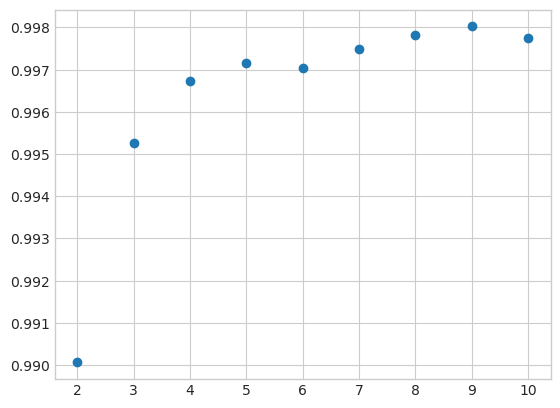

In [109]:
statistical_cols = ['precision','accuracy','f1-score','recall','folds']
cross_validation_list = np.arange(2,11)
results = list()
for cv in cross_validation_list:
    result = compute_RF_Classification(trainX_data=X_train,trainY_data=Y_train.ravel(),scaler=StandardScaler(),cross_validation = cv)
    result.append(cv)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['folds'],statistics['f1-score'])
selected_fold = statistics.sort_values(by=['f1-score'],ascending=False)['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

### Confusion Matrix of best k Fold cross validation
Visualization of the confusion matrix of the best K Fold cross validation split

* Confusion matrix helps to visualize the performance of the model
* The diagonal elements represent the number of points for which the predicted label is equal to the true label
* Off-diagonal elements are those that are mislabeled by the classifier.
* The higher the diagonal values of the confusion matrix the better, indicating many co

Confusion Matrix
[[1126    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0 1144    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 1195    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    1    0]
 [   0    0    0    0  955    0    0    0    0    0    0    1    0    0
     0    0    0    1    0    0    0    0    0    0]
 [   0    0    0    0    0 1200    1    0    0    0    0    0    0    0
     3    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1088    0    0    0    0    0    0    0
     0    0    0    0    2    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1011    0    0    0    0    0    0
     1    0    0    0    1    0    0

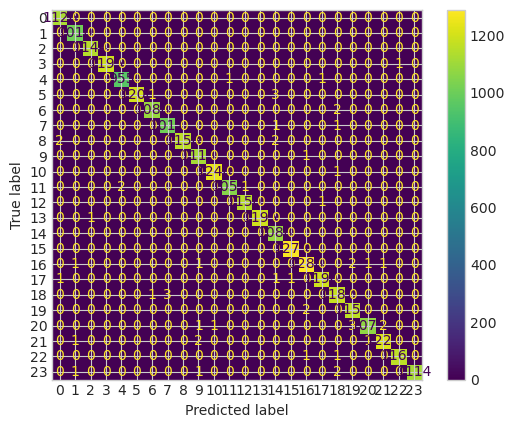

,precision,recall,f1-score,support
0,0.997343,1.000000,0.998670,1126.000000
1,0.997038,1.000000,0.998517,1010.000000
2,0.999127,1.000000,0.999563,1144.000000
3,1.000000,0.999164,0.999582,1196.000000
4,0.997910,0.997910,0.997910,957.000000
5,1.000000,0.996678,0.998336,1204.000000
6,0.998165,0.998165,0.998165,1090.000000
7,0.997041,0.998026,0.997533,1013.000000
8,1.000000,0.996558,0.998276,1162.000000
10,0.995528,0.999102,0.997312,1114.000000


,Actual,Predicted
0,3,3
1,6,6
2,2,2
3,2,2
4,13,13
...,...,...
27450,13,13
27451,23,23
27452,18,18
27453,17,17


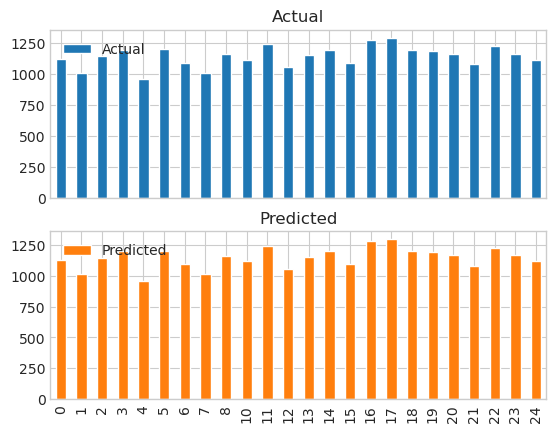

In [110]:
result = compute_RF_Classification(flag=1,trainX_data=X_train,trainY_data=Y_train.ravel(),scaler=StandardScaler(),cross_validation = selected_fold)

## Fine-Tune the Model

In [111]:
best_estimator = None
results = list()
palette = plt.get_cmap('Set1')
grid_results = list()
scores = ['f1_macro']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    trainX_data = X_train
    for sclr in scaler:
        pipe = Pipeline([('standardizer', sclr), ('rf', RandomForestClassifier())])    
        clf = RandomizedSearchCV(pipe,param_distributions  = random_grid,n_iter=1,cv=selected_fold,scoring=score,verbose=1,n_jobs=-1)
        clf.fit(X_train,Y_train.ravel())
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['scaler'] = SCLR
        best_estimator = clf.best_estimator_
        results.append(clf.best_params_)
randomsearchcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(randomsearchcv_results)

# Tuning hyper-parameters for f1_macro

Fitting 9 folds for each of 1 candidates, totalling 9 fits
Fitting 9 folds for each of 1 candidates, totalling 9 fits


,rf__n_estimators,rf__criterion,score,best_score,scaler
1,100,entropy,f1_macro,0.997763,"[StandardScaler(), None]"
0,10,entropy,f1_macro,0.985835,"[StandardScaler(), None]"


## Best Random Forest Model
Given the cross-validation results, these are the best hyperparameters of the RF model after parameter tuning

In [120]:
randomsearchcv_results.head(1)

,rf__n_estimators,rf__criterion,score,best_score,scaler
1,100,entropy,f1_macro,0.997763,StandardScaler()


## Testing Phase - Generalization Error
Test the best trained model with data it never saw before (test dataset). A confusion matrix and accuracy results are presented

### Predict on new data
Let's predict the unseen data on the testing dataset using the model with the best hyperparameters

In [121]:
scaler = StandardScaler()
training_inputs = scaler.fit_transform(X_train)
training_targets = Y_train.ravel()
test_inputs = scaler.fit_transform(X_test)
test_targets = Y_test.ravel()
model = RandomForestClassifier(n_estimators=100,criterion='entropy')
model.fit(training_inputs,training_targets)
predict_test = model.predict(test_inputs)
predict_test = best_estimator.predict(X_test)

### Performance Metrics
Set classification performance metrics

In [122]:
#Compute Classification performance details
matrix = confusion_matrix(Y_test, predict_test)
report = classification_report(Y_test, predict_test,output_dict=True)
accuracy = accuracy_score(Y_test,predict_test)
# Structure data to statistics
statistical_array = list()
statistics = pd.DataFrame(report).transpose()
error_dataframe = pd.DataFrame({'Actual': Y_test, 'Predicted':predict_test})

### Performance Outputs
Outputs the Confusion Matrix and related visualization

Confusion Matrix
[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 408   0   2   0   0   0   0   0  22   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 298   0   0   0   0   0   0   0   1   0   0  11   0   0   0   0
    0   0   0   0   0   0]
 [  0   1   0 242   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   1   0   0   0]
 [  1   0   0   0 473   0   0   0   0   0   0   2   0   0   0   0   0  22
    0   0   0   0   0   0]
 [  0   1   9   0   0 225   1   0   0   0   8   0   0   0   0   0   0   0
    3   0   0   0   0   0]
 [  0   0   0   1   0   0 308   0   0   0   0   0   0   0  12   0   0   0
   22   0   0   0   5   0]
 [  0   0   0   0   0   0  19 406   0   0   0   0   0   0   0   0   0   0
   11   0   0   0   0   0]
 [  1   0   0   0   0   0   0   3 219   0   3   9  17   0   0   1   0  15
    1   0   0   0   0  19]
 [  0   0   0   2   0   0   0   0   1 207   1   0   0   0   1   0  73   0


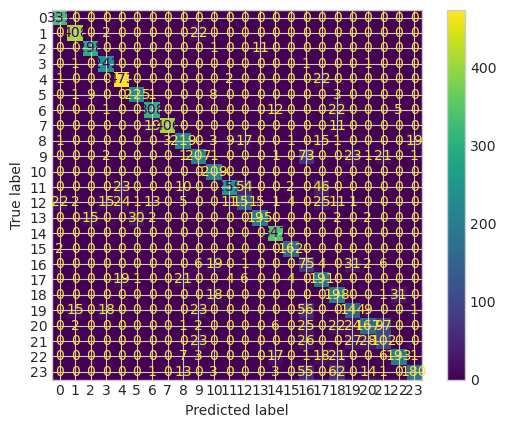

,precision,recall,f1-score,support
0,0.927171,1.000000,0.962209,331.000000
1,0.951049,0.944444,0.947735,432.000000
2,0.925466,0.961290,0.943038,310.000000
3,0.864286,0.987755,0.921905,245.000000
4,0.877551,0.949799,0.912247,498.000000
5,0.875486,0.910931,0.892857,247.000000
6,0.895349,0.885057,0.890173,348.000000
7,0.992665,0.931193,0.960947,436.000000
8,0.790614,0.760417,0.775221,288.000000
10,0.723776,0.625378,0.670989,331.000000


,Actual,Predicted
0,6,6
1,5,5
2,10,10
3,0,0
4,3,3
...,...,...
7167,1,10
7168,12,12
7169,2,2
7170,4,4


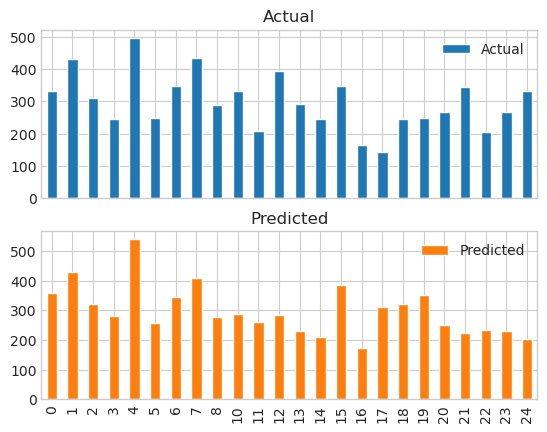

In [123]:
print("Confusion Matrix")
print(matrix)
print("Confusion Matrix Graphical Visualization:")
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.show()
display(statistics)
display(error_dataframe)
error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
result = pd.DataFrame(Y_train,columns=["Label"]).join(error)

## Random Forest Metrics
Table format presentation of the Random Forest actual performance metrics on the testing dataset

In [125]:
results = [structure_data(statistics['precision'].mean(),accuracy,statistics['f1-score'].mean(), statistics['recall'].mean())]
statistical_cols = ['precision','accuracy','f1-score','recall']
statistics = pd.DataFrame(columns=statistical_cols,data=results)
overall_models_performance['RF'] = results
display(statistics.sort_values(by=['f1-score'],ascending=False))

,precision,accuracy,f1-score,recall
0,0.765918,0.793363,0.755826,0.763054


# Overall Performance Table

In [131]:
flattened_perf = [[k, *v] for k, values in overall_models_performance.items() for v in values]
statistics = pd.DataFrame(flattened_perf,columns=['algorithm','precision','accuracy','f1-score','recall'])
display(statistics.sort_values(by=['f1-score'],ascending=False))

,algorithm,precision,accuracy,f1-score,recall
3,MLP,0.819581,0.832962,0.816352,0.823273
1,KNN,0.816609,0.813581,0.803231,0.806971
0,RF,0.765918,0.793363,0.755826,0.763054
2,LR,0.686402,0.692415,0.673743,0.679621
